<table>
    <tbody>
        <tr>
            <th>
                <p><img alt="Emblema\" src="https://upload.wikimedia.org/wikipedia/en/6/69/Seal_of_Pablo_de_Olavide_University.png" style="width:150px;"></p>
            </th>
            <th>
                <p><strong>Inteligencia Artificial</strong></p><p><strong>Grado en Ingeniería Informática en Sistemas de Información</strong></p><p><strong>TRABAJO IA</strong>
            </th>
        </tr>
    </tbody>
</table>

# Redes Neuronales

En éste notebook desarrollaremos e implementaremos el algoritmo de "Redes Neuronales", usando el conjunto de datos *Medical Insurance Cost Prediction*.
___

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as op
import math
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Análisis de los datos

El conjunto de datos está enfocado a la predicción del coste del seguro médico, y nos brinda 54 características con las que operar.

[En ésta página web](https://www.kaggle.com/datossets/mohankrishnathalla/medical-insurance-cost-prediction/datos) podremos ver en profundidad qué representan las distintas características.

En resumen, éstas pueden condensarse en 6 grupos:

1. Demográficas y Socioeconómicas.
2. Hábitos y estilo de vida.
3. Salud y datos clínicos.
4. Utilización del sistema sanitario y sus procedimientos.
5. Seguro y Políticas.
6. Costes médicos y pagos.

Carguemos los datos y echémosles un vistazo:

In [2]:
datos = pd.read_csv('./medical_insurance.csv')
datos.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


___
### Incongruencias y/o valores problemáticos
Antes de operar con el conjunto de datos, debemos hacer un análisis del mismo, en busca de datos problemáticos que puedan afectar a la calidad de nuestros modelos.

#### Problemas específicos de columna

##### Edad (18 a 90 años)
Con una simple comprobación, podemos ver cómo existen valores fuera de la franja de edad establecida.

Menores de 18:

In [3]:
datosAux = datos[datos.age < 18]
datosAux.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
59,576,12,Male,Central,Suburban,52500.0,Masters,Divorced,Employed,2,...,0,0,0,0,0,1,0,0,0,0
89,30713,10,Female,South,Urban,69000.0,Some College,Single,Employed,3,...,0,0,0,1,0,0,1,1,0,0
159,13800,6,Female,West,Suburban,57600.0,Some College,Married,Self-employed,2,...,0,0,0,1,0,0,1,0,0,0
167,3232,15,Male,West,Suburban,48200.0,Bachelors,Single,Retired,3,...,0,0,0,1,0,1,0,1,0,0


Mayores de 90:

In [4]:
datosAux = datos[datos.age > 90]
datosAux.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
266,42222,91,Female,East,Suburban,32700.0,No HS,Married,Employed,3,...,0,0,0,1,0,1,0,1,1,0
355,33076,96,Female,East,Suburban,78900.0,HS,Married,Unemployed,4,...,0,0,1,0,0,0,2,1,1,1
651,65644,93,Male,East,Suburban,64100.0,Masters,Widowed,Employed,3,...,0,0,1,0,0,0,2,1,1,0
786,8312,91,Female,South,Suburban,209700.0,Bachelors,Single,Retired,2,...,0,1,0,0,0,0,0,0,1,0
845,67703,91,Male,North,Urban,11000.0,Bachelors,Married,Self-employed,2,...,0,0,0,0,0,2,0,1,1,0


En un principio, **para aquellos pacientes de más de 90 años, no tendríamos mayor problema**, simplemente se han salido del rango.

Sin embargo, **para aquellos pacientes menores a 18 años, las incongruencias son evidentes**: Algunos están supuestamente casados o divorciados y hasta empleados o retirados.

Por tanto, **debemos sanear éstos datos** en caso de que queramos usarlos. Para ello, tendríamos **diferentes métodos**:
1. **Elevar la edad hasta el mínimo de 18 años**: Es la vía más fácil, pero en muchos casos seguiría siendo insuficiente para mantener consistencia en los datos.
2. **Sustituir la edad de éstos pacientes a la media o mediana de todos los pacientes**: Permite una aproximación más cercana a la realidad que el método anterior, pero seguiría habiendo casos incongruentes. Por ejemplo, si la media o mediana fuesen 35 años, habría pacientes retirados a esa edad.
3. **Sustituir la edad de éstos pacientes por la media o mediana del resto de pacientes con el mismo estado civil y/o laboral**: Ésto permite una mejor aproximación a la realidad, ya que estaríamos aproximando las edades en base a los datos de pacientes parecidos. Con éste método, nos aseguramos tener muchas menos incongruencias que con los métodos anteriores.
4. **Sustituir en base a otras características comunes**: Lo mismo que el punto anterior, pero cambiando de características

Vamos a usar el tercer método con el estado civil para sanear éstos problemas:


In [5]:
unique_marital_status = datos.marital_status.unique()
unique_employment_status = datos.employment_status.unique()
status_avg = {};
# Determinamos los valores medios de cada grupo.
for marital_status in unique_marital_status:
    status_avg[marital_status] = {}
    for employment_status in unique_employment_status:
        mean = datos[(datos.marital_status == marital_status) 
            & (datos.employment_status == employment_status)].age.mean();
        # Imprimo en double para comprobar que no estamos
        # haciendo nada mal, pese a dar valores super parecidos:
        print("Promedio de", marital_status, ",", employment_status, ":", mean)
        status_avg[marital_status][employment_status] = int(mean)


Promedio de Married , Retired : 47.691068400226115
Promedio de Married , Employed : 47.56931721437085
Promedio de Married , Self-employed : 47.33412172816146
Promedio de Married , Unemployed : 47.55836098687058
Promedio de Single , Retired : 47.63596920923723
Promedio de Single , Employed : 47.358408202629306
Promedio de Single , Self-employed : 47.65507584597433
Promedio de Single , Unemployed : 47.5043630017452
Promedio de Divorced , Retired : 47.79642058165548
Promedio de Divorced , Employed : 47.187691521961185
Promedio de Divorced , Self-employed : 47.855582524271846
Promedio de Divorced , Unemployed : 48.48947951273533
Promedio de Widowed , Retired : 47.09424083769633
Promedio de Widowed , Employed : 47.59422824661128
Promedio de Widowed , Self-employed : 46.924528301886795
Promedio de Widowed , Unemployed : 47.26103646833013


Aquí tenemos **algo muy inusual**. **Las medias** de éstos grupos **se parecen muchísimo**, incluso entre grupos como "Single, Employed" y "Married,Retired", que deberían de tener promedios muy distintos.

Ésto es una **prueba bastante clara de que éstos datos son sintéticos**: han sido generados por un algoritmo. Por tanto, **no debemos de fiarnos mucho de los resultados que nos dé el modelo**, ya que **no estarán basados en datos reales**.
Igualmente, intentaremos que el modelo sea de calidad, aunque sea sobre sus propios valores sintéticos.

Volviendo con la implementación, voy a crear una función que haga de "máscara" para poder sustituir los valores que están mal. Básicamente, sólo va a seleccionar los datos que den un "true" por la máscara. 
En éste caso, queremos dar un true en caso de que el menor tenga un estado civil distinto de soltero y/o que su estado laboral no sea desempleado:

In [6]:
def esInconsistente(linea):
    if linea.age < 18:
        if linea.marital_status != 'Single':
            return True
        elif linea.employment_status != 'Unemployed':
            return True
    return False

Aplicamos los cambios:

In [7]:
datos_sanados = datos.copy()

# Guardamos una serie booleana con la que decidiremos
# si todo esta ok o no
mascara = datos.apply(esInconsistente, axis=1)

# En base a la máscara, hacemos cambios
datos_sanados.loc[mascara, 'age'] = datos_sanados[mascara].apply(
    lambda linea: status_avg[linea['marital_status']][linea['employment_status']], 
    axis=1
)

datos_sanados.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,47,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


___
##### Paciente de alto riesgo y puntuación de riesgo
Las características "Paciente de alto riesgo" (*is_high_risk*) y "Puntuación de riesgo" (*risk_score*) están estrechamente relacionadas.

La primera, *is_high_risk*, indica de forma binaria con un 1 si el paciente es de alto riesgo, y con un 0 el caso contrario.
La segunda, *risk_score*, indica la puntuación (normalizada) de un paciente de ser de alto riesgo. Al estar normalizada, podemos interpretar dicha columna como "la probabilidad de que el paciente sea o pase a ser de alto riesgo".

Por tanto, podríamos pensar que no tiene sentido que un paciente tenga un 100% de probabilidades de ser de alto riesgo y que aún no lo sea.

Echémos un vistazo:

In [8]:
datosAux = datos_sanados.loc[(datos_sanados.is_high_risk == 0) 
    & (datos_sanados.risk_score == 1)]
datos_sanados.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,47,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


Por tanto, podemos estar tranquilos: No hay paciente que haya sacado el máximo *risk_score* que no se haya catalogado como *is_high_risk = 1*.

___
#### Problemas generales
##### Valores nulos

Miremos que no existen valores nulos ni NaN dentro del datosset:

In [9]:
colNames = datos_sanados.columns
colsNullNaN = []
print(colNames)
for col in colNames:
    if datos_sanados[col].isnull().values.any():
        colsNullNaN.append(col)

print('Columnas con valores nulos o NaN:', colsNullNaN)

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

In [10]:
datos_sanados[datos_sanados['alcohol_freq'].isnull()]['alcohol_freq']

0        NaN
2        NaN
3        NaN
8        NaN
19       NaN
        ... 
99988    NaN
99990    NaN
99993    NaN
99994    NaN
99999    NaN
Name: alcohol_freq, Length: 30083, dtype: object

Como hemos podido comprobar, en la columna de frecuencia de uso de alcohol *alcohol_freq* hay valores nulos.

Por tanto, **éstos valores han de ser saneados si se pretenden usar**. Las **opciones de saneamiento** que tenemos son prácticamente las mismas que en las edades:
- **Establecer un valor concreto que sustituirá a los nulos**: Podríamos decir que, allá donde encontremos un nulo, significará que el paciente no bebe, que lo hace ocasionalmente, semanalmente, etc.
- **Coger el valor más común y sustituirlo en los nulos**: Cambiariamos nulos por la opción más común. Es cierto que nos aproximaríamos más a la realidad, pero seguiríamos careciendo de rigor.
- **Coger el valor más común dentro del grupo de "vecinos" y sustituirlo en los nulos**: Cambiaríamos nulos por la opción más común dentro de un grupo de pacientes parecido. Ésto nos permitiría ser más rigurosos, ya que tendríamos en cuenta distintos factores por el cual sustituiríamos el valor nulo. Una opción sería hacer grupos por edad, estado civil, sexo y estudios, por ejemplo.
- **Eliminar las filas erróneas**: Hemos comprobado que existen solo 415 filas de 100000 que hay en el datosset con éste problema.
Para contrastar con el método anterior, no sería mala opción.

Debido a que son pocas filas, vamos a limitarnos a sustituir los datos nulos por la moda de la columna:

In [11]:
alcohol_freq_mode = datos_sanados['alcohol_freq'].mode()[0]
alcohol_freq_mode

'Occasional'

In [12]:
datos_sanados['alcohol_freq'] = datos_sanados['alcohol_freq'].fillna(alcohol_freq_mode)
print(datos_sanados['alcohol_freq'].unique())

['Occasional' 'Weekly' 'Daily']


___
##### Variables categóricas
Las variables categóricas han de pasarse a numéricas. Para ello, podemos usar dos métodos:
- **Label encoding**: Cambiamos cada tipo de valor por un número entero. Para valores que tengan relación y cierta continuidad, tendría sentido usar ésta opción, ya que implícitamente se crea una relación mayor-menor entre los valores. Ej.: Frecuencia de uso de alcohol -> `['Occasional' -> 1, 'Weekly' -> 2, 'Daily' -> 3]`

- **One-hot encoding**: Se crea, por cada valor único de la tabla, una nueva columna binaria. En ellas se pondría un 0 o un 1 dependiendo del valor de la fila original. Ésto, en contraste con el label encoding, no crea un orden intrínseco para los valores de la columna. Sería ideal, por ejemplo, para la columna región, que tiene como valores únicos norte, sur, este y oeste (no hay orden aquí, ej.: sur no es "menor" que norte).

Teniendo en cuenta ambos métodos, vamos a realizar la conversión:

In [13]:
# Label encoding

# Tenemos que crear unos "mapas" mediante los cuales
# le asignaremos valores numéricos a los distintos
# valores de cada columna.

# La educación la ordenaremos de menor a mayor formación
education_map = {
    'No HS': 0, 'HS': 1, 'Some College': 2,
    'Bachelors': 3, 'Masters': 4, 'Doctorate': 5
}

# Ésta variable podría ser codificada mediante otras técnicas,+¡
# pero me ha parecido interesante repartirla así
smoker_map = {
    'Never': 0, 'Former': 1, 'Current': 2
}

# Ordenamos según la frecuencia
alcohol_map = {
    'None': 0, 'Occasional': 1, 'Weekly': 2, 'Daily': 3
}

# Ordenamos por rango, de peor a mejor.
tier_map = {
    'Bronze': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3
}

# Aplicamos los cambios
datos_sanados['education_encoded'] = datos_sanados['education'].map(education_map)
datos_sanados['smoker_encoded'] = datos_sanados['smoker'].map(smoker_map)
datos_sanados['alcohol_freq_encoded'] = datos_sanados['alcohol_freq'].map(alcohol_map)
datos_sanados['network_tier_encoded'] = datos_sanados['network_tier'].map(tier_map)

# get_dummies no borra las columnas originales, así que tenemos que hacerlo nosotros.
datos_sanados.drop(columns=['education', 'smoker', 'alcohol_freq', 'network_tier'], inplace=True)

datos_sanados.head()
print(datos_sanados.columns)

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'marital_status', 'employment_status', 'household_size', 'dependents',
       'bmi', 'visits_last_year', 'hospitalizations_last_3yrs',
       'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp',
       'diastolic_bp', 'ldl', 'hba1c', 'plan_type', 'deductible', 'copay',
       'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality',
       'risk_score', 'annual_medical_cost', 'annual_premium',
       'monthly_premium', 'claims_count', 'avg_claim_amount',
       'total_claims_paid', 'chronic_count', 'hypertension', 'diabetes',
       'asthma', 'copd', 'cardiovascular_disease', 'cancer_history',
       'kidney_disease', 'liver_disease', 'arthritis', 'mental_health',
       'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count',
       'proc_consult_count', 'proc_lab_count', 'is_high_risk',
       'had_major_procedure', 'education_encoded', 'smoker_encoded',
       'alcohol_freq_en

In [14]:
# One-Hot Encoding

# El one-hot es mucho más sencillo si hacemos uso de get_dummies,
# ya que lo hace automáticamente. Pero primero, tenemos que indicarle
# sobre qué columnas queremos el onehot:
nominal_cols = [
    'sex', 'region', 'urban_rural', 
    'marital_status', 'employment_status', 'plan_type'
]

# IMPORTANTE: Si no le ponemos el dtype=int, en vez de devolver 0 o 1, devolverá
# true o false. Para el modelo de regresión logística, que al fin y al cabo
# no son más que un conjunto de fórmulas matemáticas, necesitamos el
# valor numérico para poder operar.
datos_sanados = pd.get_dummies(datos_sanados, columns=nominal_cols, dtype=int)

# Vemos el resultado
datos_sanados.head()

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,marital_status_Single,marital_status_Widowed,employment_status_Employed,employment_status_Retired,employment_status_Self-employed,employment_status_Unemployed,plan_type_EPO,plan_type_HMO,plan_type_POS,plan_type_PPO
0,75722,52,22700.0,3,1,27.4,2,0,0,4,...,0,0,0,1,0,0,0,0,0,1
1,80185,79,12800.0,3,1,26.6,2,0,0,3,...,0,0,1,0,0,0,0,0,1,0
2,19865,68,40700.0,5,3,31.5,1,0,0,4,...,0,0,0,1,0,0,0,1,0,0
3,76700,47,15600.0,5,3,31.6,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,92992,53,89600.0,2,0,30.5,3,0,0,2,...,0,0,0,0,1,0,0,0,1,0


___
##### Normalización y estandarización

Para empezar, las columnas a normalizar serán, por lo general, aquellas que no se pretendan predecir. Es decir, si estoy intentando predecir el coste anual del seguro médico, no voy a normalizar dicha columna; en cambio, si estoy usando el coste anual para predecir otra cosa, ahí si consideraré su normalización.

También, por lo general, **deberíamos de normalizar todos los campos numéricos** para mantener una magnitud similar, sobretodo en aquellos campos donde las magnitudes sean especialmente dispares.

Sin embargo, **hay casos donde podría no ser la mejor opción**:
- **Campos "Binarios"**: Aquellos campos cuyos valores sean únicamente 1 y 0 no se normalizan. De hecho, en caso de hacerlo, sus valores no cambiarían.
- **Campos discretos con baja magnitud**: Por ejemplo, en campos como *visits_last_year*, normalizarlos no tiene sentido, ya que sus valores no suelen cambiar de magnitud de uno a otro, ni tenemos valores intermedios.

Por lo tanto, valores como la presión sistólica, el ingreso, el coste anual, etc podrían ser buenos candidatos para ser normalizados.
Teniendo eso en cuenta, vamos a proceder a normalizar usando la fórmula del Z-Score:

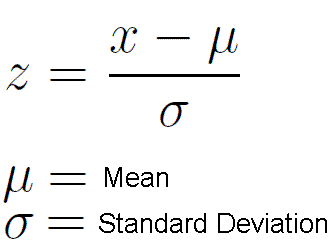


In [15]:
# Lista de columnas continuas a normalizar
columnasNormalizar = [
    'age', 'income', 'bmi', 'visits_last_year', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 
    'deductible', 'copay', 'annual_medical_cost', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid'
]

# Aplicamos la fórmula del z-score: (valor - media) / desviacionEstandar
#
# Si lo hacemos de la siguiente manera, estaremos usando la vectorización que usa pandas por dentro,
# por lo que ésta operación se vuelve bastante más ligera
datos_normalizados = datos_sanados.copy()

datos_normalizados[columnasNormalizar] = (datos_normalizados[columnasNormalizar] 
                                          - datos_normalizados[columnasNormalizar].mean()) / datos[columnasNormalizar].std()

# Comprobamos los datos
datos_normalizados.head()

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,marital_status_Single,marital_status_Widowed,employment_status_Employed,employment_status_Retired,employment_status_Self-employed,employment_status_Unemployed,plan_type_EPO,plan_type_HMO,plan_type_POS,plan_type_PPO
0,75722,0.215277,-0.580636,3,1,0.081982,0.041635,0,-0.271921,2.285245,...,0,0,0,1,0,0,0,0,0,1
1,80185,1.903964,-0.792174,3,1,-0.078182,0.041635,0,-0.271921,1.458360,...,0,0,1,0,0,0,0,0,1,0
2,19865,1.215980,-0.196023,5,3,0.902822,-0.533829,0,-0.271921,2.285245,...,0,0,0,1,0,0,0,1,0,0
3,76700,-0.097443,-0.732345,5,3,0.922842,-1.109292,0,-0.271921,-0.195409,...,0,0,0,0,1,0,0,1,0,0
4,92992,0.277821,0.848844,2,0,0.702617,0.617098,0,-0.271921,0.631475,...,0,0,0,0,1,0,0,0,1,0


### Correlación

Calculemos la correlación de todas las columnas con la columna objetivo que hemos decidido predecir: *is_high_risk*

In [16]:
columna_objetivo = 'is_high_risk'

Para ello, vamos a crearnos dos funciones que nos ayuden a calcular y visualizar la correlación de las columnas, respectivamente.
La primera función simplemente hará el cálculo de las correlaciones, y la segunda las mostrará en una gráfica:

In [17]:
def calcularCorrelacionPearson(columna_objetivo, columnas, datosframe):
    serie_corr = pd.Series()
    for col in columnas:
        serie_corr[col] = datosframe[columna_objetivo].corr(datosframe[col])
    return serie_corr

def mostrarCorrelacion(serie_corr, tituloFigura=''):
    # Ordenamos de mayor a menos para que también se pinten
    # las barras ordenadas.
    serie_corr = serie_corr.sort_values(ascending=True)
    
    altura = max(6, len(serie_corr) * 0.3) 
    plt.figure(figsize=(10, altura))
    
    # Usamos barh para crear un gráfico de barras horizontal.
    plt.barh(serie_corr.index, serie_corr.values)
    
    plt.title(tituloFigura, fontsize=15)
    plt.xlabel('Coeficiente de Correlación de Pearson', fontsize=12)
    plt.axvline(x=0, color='black', linewidth=0.8)
    # Añadimos una rejilla para poder ver mejor los datos
    plt.grid(axis='x', linestyle='--', alpha=0.5)  # Rejilla suave
    
    # Para mejor visualización, ponemos un valor numérico al lado de cada
    # barra.
    for i, valor in enumerate(serie_corr.values):
        plt.text(valor, i, f'{valor:.2f}', va='center', fontsize=9, fontweight='bold')

    plt.show()
    

Además, también aprovecharemos para ir seleccionando aquellas columnas para entrenar nuestro modelo. Para ello, estableceremos un umbral mínimo, y todas las columnas que vayan sobrepasando dicho umbral se irán añadiendo a nuestra lista de columnas.

In [18]:
# Aquí guardaremos todas nuestras columnas de entrenamiento
columnas_entr = []
umbral = 0.10

def selColumnasEntrenamiento(umbral, serie_corr):
    cols_seleccionadas = []
    cols = serie_corr.index.to_list()
    for col in cols:
        if serie_corr[col] >= umbral:
            cols_seleccionadas.append(col)
    return cols_seleccionadas

Sin embargo, no vamos a calcular las correlaciones de todas las columnas a la vez. 

Vamos a usar las divisiones de columnas nombradas al inicio, para poder tener una perspectiva más amplia de cuanto afecta cada grupo de datos. También tendremos en cuenta las modificaciones y arreglos aplicados al datosset, a la hora de seleccionar éstas columnas.

#### 1. Demográficas y Socioeconómicas

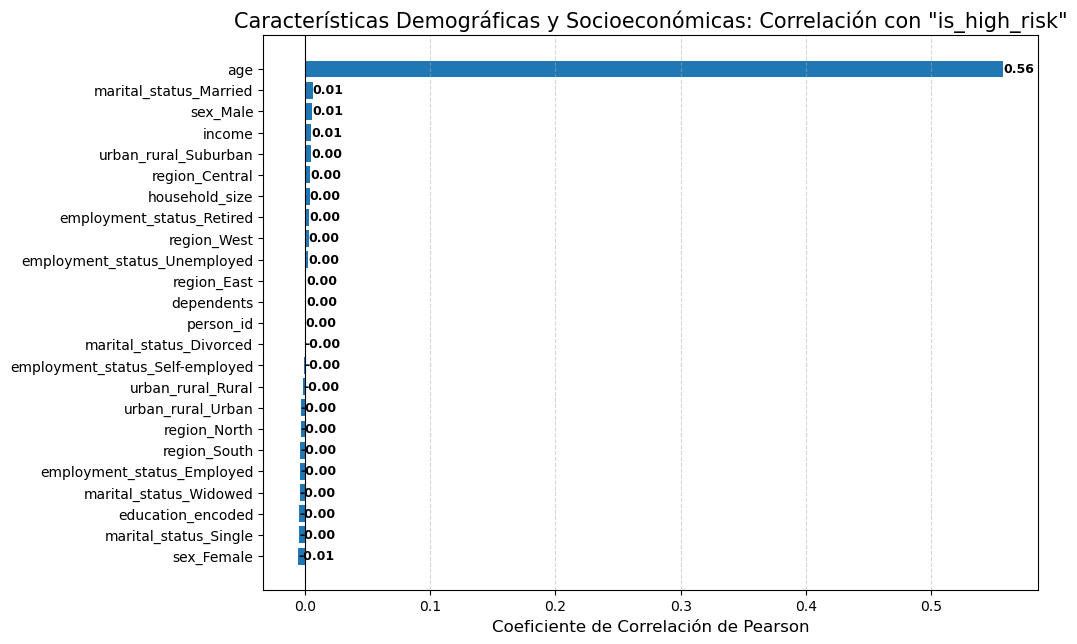

In [19]:
demog_socioeco_cols = ['person_id', 'age', 
        'income', 'education_encoded', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'marital_status_Widowed', 'employment_status_Employed',
       'employment_status_Retired', 'employment_status_Self-employed',
       'employment_status_Unemployed', 'household_size', 'sex_Female',
       'sex_Male','region_Central', 'region_East',
       'region_North', 'region_South', 'region_West', 'urban_rural_Rural',
       'urban_rural_Suburban', 'urban_rural_Urban','dependents']

demog_socioeco_corr = calcularCorrelacionPearson(columna_objetivo, demog_socioeco_cols, datos_normalizados)
columnas_entr += selColumnasEntrenamiento(umbral, demog_socioeco_corr)

mostrarCorrelacion(demog_socioeco_corr, 'Características Demográficas y Socioeconómicas: Correlación con "is_high_risk"')

Éstos resultados no deberían sorprender a nadie: Tiene sentido que **el factor más influyente** dentro de éste grupo de características sea **la edad**, y que características como la región y el estado civil a penas tengan peso.

Muy por detrás de la correlación de la edad, podemos ver que parece ser que las personas casadas tienen muy ligeramente un mayor riesgo de ser pacientes de alto riesgo. Podemos suponer que lo más probable es que las personas que estén casadas también suelan ser mayores, lo que genera esa insignificante correlación.

También parece ser que los hombres tienen más probabilidad de ser de alto riesgo que las mujeres, aunque la correlación sigue siendo muy baja.

#### 2. Hábitos y estilo de vida
Investigando las columnas del datosset, he visto que hay columnas mencionadas en la descripción adjunta que no están incluidas en los datos:
- `exercise_frequency`
- `sleep_hours`
- `stress_level`

Por tanto, éstas columnas no serán incluidas.
Miremos la correlación en las columnas restantes:

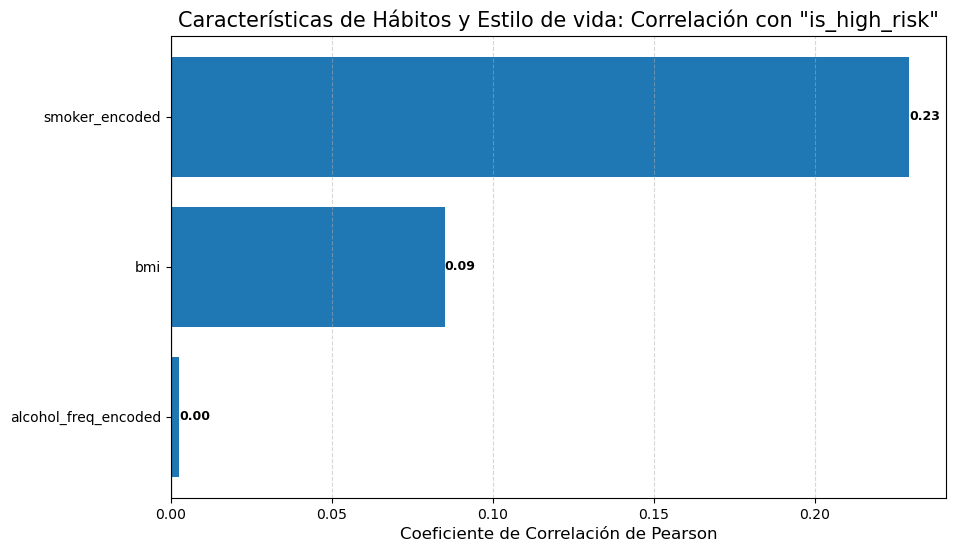

In [20]:
habitos_cols = ['bmi', 'smoker_encoded', 'alcohol_freq_encoded']

habitos_corr = calcularCorrelacionPearson(columna_objetivo, habitos_cols, datos_normalizados)
columnas_entr += selColumnasEntrenamiento(umbral, habitos_corr)

mostrarCorrelacion(habitos_corr, 'Características de Hábitos y Estilo de vida: Correlación con "is_high_risk"')

Como podemos ver, ser fumador tiene una correlación positiva bastante sustancial, lo cuál tiene todo el sentido.

También es curioso que el índice de masa corporal (*bmi*) tenga más correlación con ser paciente de riesgo que la frecuencia de uso de alcohol.

Aquí podríamos sacar la conclusión de que, obviamente, el sobrepeso tiene cierta influencia sobre la salud.

A su vez, podríamos discutir que, si eres paciente de riesgo y tienes que quedarte en un hospital por grandes periodos de tiempo, también tengas dificultad a la hora de ejercitarte y comer debidamente, por lo que sería normal que aumente el *bmi* en dichos casos.

Todas éstas consideraciones, junto con aquellas que no he mencionado ni se me han ocurrido, hacen que el análisis de datos sea complejo e interesante.

#### 3. Salud y datos clínicos
Nuestra columna objetivo pertenece a éste conjunto de características, por lo que no la incluiremos a la hora de calcular las correlaciones. Sin embargo, sí la añadiremos al conjunto de columnas de entrenamiento, ya que, aunque sea como columna objetivo, formará parte de él.

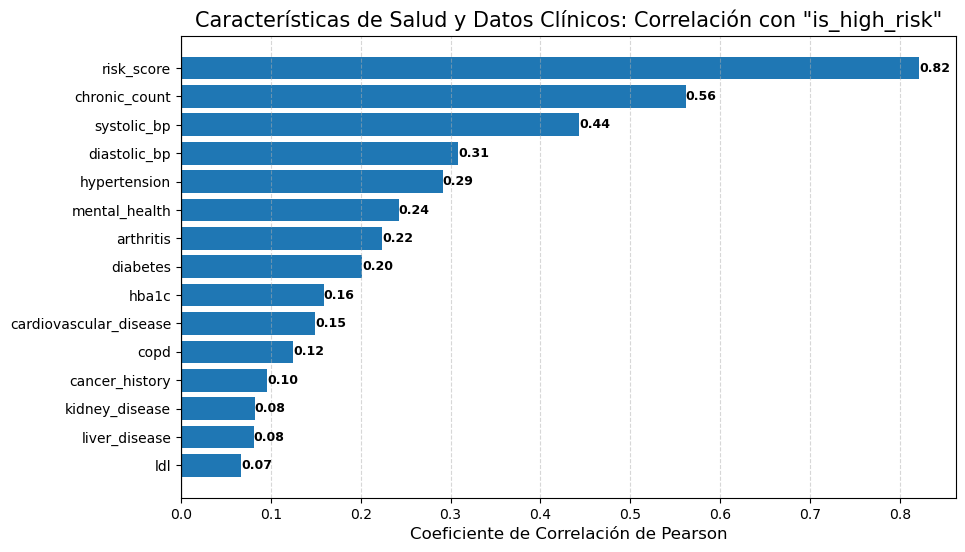

In [21]:
salud_cols = ['hypertension', 'diabetes', 'copd', 'cardiovascular_disease', 
    'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 
    'mental_health', 'chronic_count', 'systolic_bp', 'diastolic_bp', 
    'ldl', 'hba1c', 'risk_score']

salud_corr = calcularCorrelacionPearson(columna_objetivo, salud_cols, datos_normalizados)
columnas_entr += selColumnasEntrenamiento(umbral, salud_corr)
columnas_entr.append('is_high_risk')

mostrarCorrelacion(salud_corr, 'Características de Salud y Datos Clínicos: Correlación con "is_high_risk"')

Como nuestra columna objetivo define si el paciente es o no de riesgo (*is_high_risk*), es lógico que éste grupo de características, junto con los hábitos, tengan mayor influencia.

Empezando por la columna *risk_score*, podemos ver una correlación muy alta, ya que ésta columna representa una probabilidad calculada de que el paciente vaya a ser de riesgo. Sin embargo, y por esa misma razón, no tendría sentido incluir dicha columna en el entrenamiento, ya que nuestra tarea es precisamente dar ese valor. Por tanto, excluyámosla de la lista:

In [22]:
columnas_entr.remove('risk_score')
print(columnas_entr)

['age', 'smoker_encoded', 'hypertension', 'diabetes', 'copd', 'cardiovascular_disease', 'arthritis', 'mental_health', 'chronic_count', 'systolic_bp', 'diastolic_bp', 'hba1c', 'is_high_risk']


Volviendo al diagrama, podemos ver que el *chronic_count* tiene una alta correlación con ser paciente de riesgo, lo cual también es bastante obvio: Cuantas más patologías crónicas tengas, más delicada es tu salud.

Las características cardiovasculares como la presión sistólica, diastólica, y la hipertensión, también parecen tener una fuerte correlación, por razones también obvias.

Por último, a modo de resumen, el resto de enfermedades también tienen una correlación positiva. De una forma u otra, todas afectan a la salud del paciente, por lo que es de esperar. Sin embargo, es especialmente curioso que enfermedades del hígado y el historial de cáncer no tengan a penas peso.

#### 4. Utilización del sistema sanitario y sus procedimientos

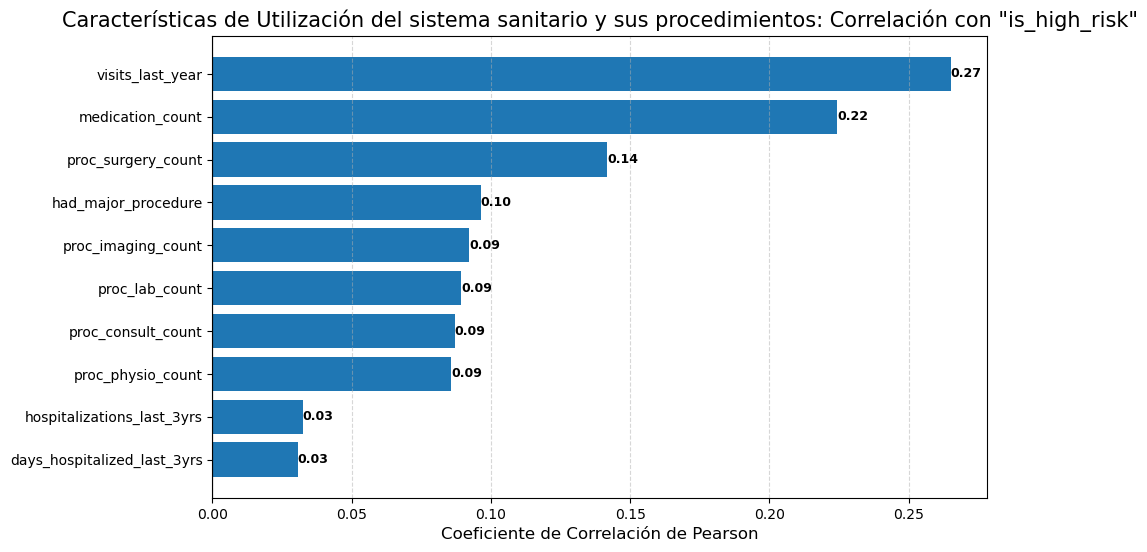

In [23]:
sanidad_cols = ['visits_last_year', 'hospitalizations_last_3yrs',
    'days_hospitalized_last_3yrs', 'medication_count','proc_imaging_count',
    'proc_surgery_count', 'proc_physio_count', 'proc_consult_count', 
    'proc_lab_count', 'had_major_procedure',]

sanidad_corr = calcularCorrelacionPearson(columna_objetivo, sanidad_cols, datos_normalizados)

# No vamos a añadir las columnas al conjunto de entrenamiento.
# El por qué viene explicado más abajo.
#
# columnas_entr += selColumnasEntrenamiento(umbral, sanidad_corr)

mostrarCorrelacion(sanidad_corr, 'Características de Utilización del sistema sanitario y sus procedimientos: Correlación con "is_high_risk"')


Como también es de esperar, existe una alta relación entre el uso del sistema sanitario y la probabilidad de que seas paciente de alto riesgo. Las cantidad de medicación que tomes, la cantidad de visitas del último año y la cantidad de operaciones que hayas tenido obviamente son factores muy relacionados con la salud del paciente.

Sin embargo, **éstos datos pueden suponer un problema**. **No sólo debemos tener en cuenta la correlación, si no el momento en el que se toman éstos datos** respecto a nuestra columna objetivo. Por ejemplo: Si las visitas se disparan una vez que se identifica al paciente como paciente de riesgo, no sirve usar las visitas para predecir si es de riesgo o no. Lo mismo con su medicación, número de cirugías y similares.

Por tanto, y a falta de más información, **no** vamos a incluir éstas columnas, para evitar darle datos potencialmente problemáticos a nuestro modelo.

#### 5. Seguro y Políticas

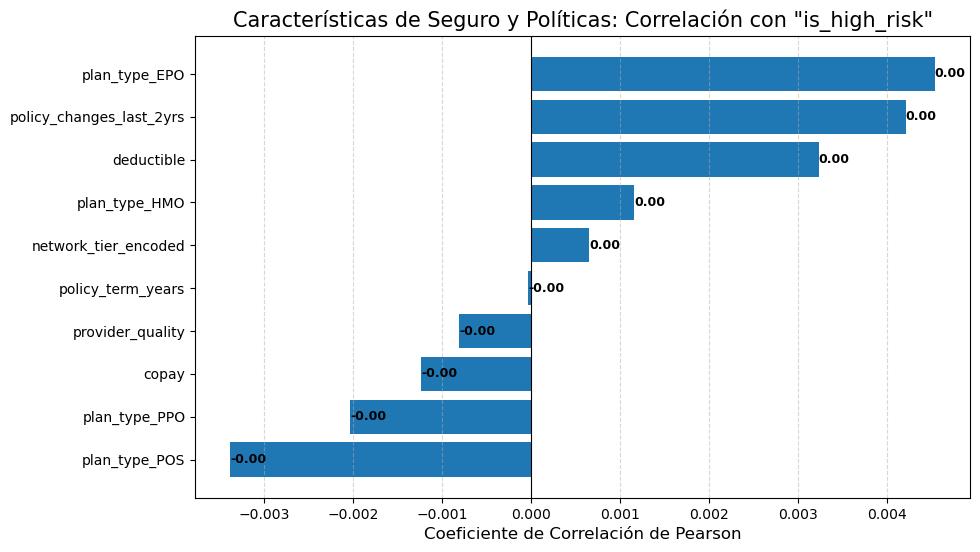

In [24]:
seguro_cols = ['plan_type_EPO', 'plan_type_HMO', 'plan_type_POS',
    'plan_type_PPO', 'network_tier_encoded', 'deductible', 'copay',
       'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality']

seguro_corr = calcularCorrelacionPearson(columna_objetivo, seguro_cols, datos_normalizados)
columnas_entr += selColumnasEntrenamiento(umbral, seguro_corr)

mostrarCorrelacion(seguro_corr, 'Características de Seguro y Políticas: Correlación con "is_high_risk"')

Éstas características parecen no tener relación a penas con ser de alto riesgo o no, por lo que las ignoraremos.

#### 6. Costes Médicos y Pagos

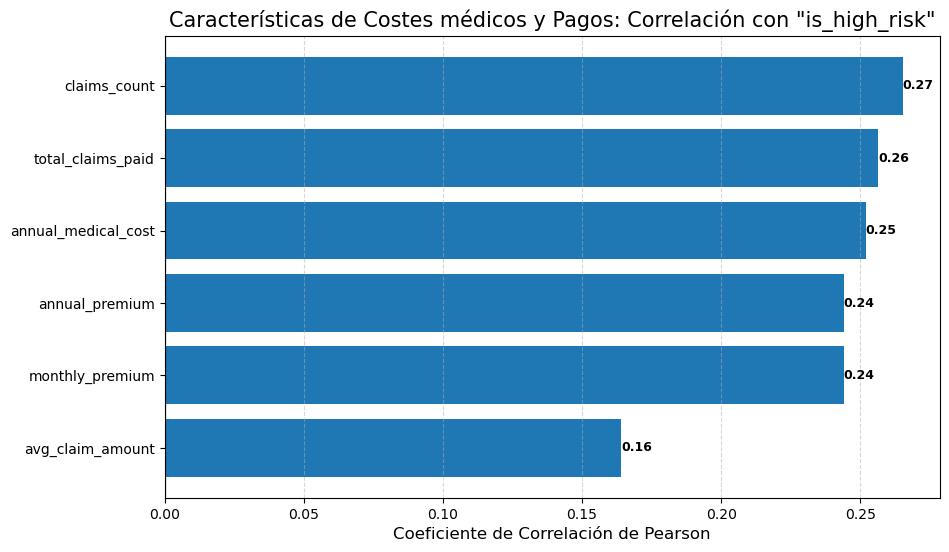

In [25]:
costes_pagos_cols = ['annual_medical_cost', 'annual_premium',
       'monthly_premium', 'claims_count', 'avg_claim_amount',
       'total_claims_paid']

costes_pagos_corr = calcularCorrelacionPearson(columna_objetivo, costes_pagos_cols, datos)

# Al igual que en el punto 4, ésto tiene su razón de ser
# columnas_entr += selColumnasEntrenamiento(umbral, costes_pagos_corr)

mostrarCorrelacion(costes_pagos_corr, 'Características de Costes médicos y Pagos: Correlación con "is_high_risk"')

Aquí podríamos encontrarnos con el mismo problema que vimos en el punto 4. La cantidad a pagar junto con la cantidad de pagos, coste médico anual, etc. pueden dispararse cuando un paciente empieza a ser de riesgo. Por tanto, también veo sensato excluir éstas columnas a la hora de entrenar nuestro modelo.

### Conclusión

Con ésto, hemos terminado de sanar, codificar, y analizar los datos que se nos han dado. Con todo ésto hecho, nuestro futuro modelo podrá ser "alimentado" con datos rigurosamente seleccionados.

Por tanto, vamos a crearnos una nueva variable que contenga el datosset únicamente con las columnas seleccionadas:

In [26]:
datos_entr = datos_normalizados[columnas_entr]
datos_entr.head()

,age,smoker_encoded,hypertension,diabetes,copd,cardiovascular_disease,arthritis,mental_health,chronic_count,systolic_bp,diastolic_bp,hba1c,is_high_risk
0,0.215277,0,0,0,0,0,1,0,1,0.207625,0.269099,-0.385307,0
1,1.903964,0,0,0,0,0,1,1,2,0.858278,0.606143,-0.929045,1
2,1.215980,0,1,0,0,0,0,1,3,2.745170,1.167882,-0.113438,1
3,-0.097443,0,0,1,0,0,0,0,1,-0.898484,-0.629684,3.420860,0
4,0.277821,0,1,0,0,0,1,0,2,1.183604,1.055534,-0.479870,1


___
## Implementación

Ahora, pasaremos a **implementar el algoritmo de redes neuronales**. Para ello, primero **declararemos las funciones necesarias**.

### Funciones

#### Función sigmoide
Convertiremos los inputs en valores del 0 a 1.

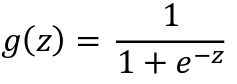

Ésto permite interpretar los números devueltos como probabilidades, y también nos permitirá saber si un caso se "activa" o no, de la siguiente forma:
- y = 1 si `sigmoid(z) >= 0.5`
- y = 1 si `sigmoid(z) < 0.5`



In [27]:
def sigmoide(z):
    # Como más tarde vamos a usar ReLU y
    # los valores no tienen límite máximo,
    # hacemos clip para evitar overflow.
    z = np.clip(z, -500, 500)
    return 1/(1+np.exp(-z))

#### Función ReLU
La función ReLU es una función muy sencilla y a la vez muy usada en aprendizaje automático, especialmente en redes neuronales.

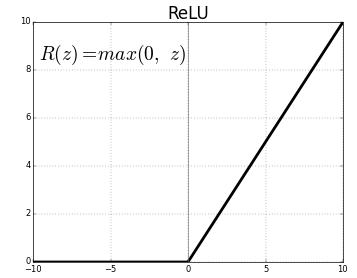


Dado a que nos ha tocado realizar modificaciones, y entre ellas se nos pide crear una red neuronal profunda (dos capas o más), nos hemos visto obligados a implementar la función *ReLU* para poder hacer que la arquitectura produnda sea capaz de aprender.

Ésto se debe a que en una red neuronal profunda, haciendo uso simplemente de la función sigmoide, nos encontramos con el problema del **desvanecimiento de gradiente**: Dado a que el máximo de la derivada de la sigmoide es `0.25`, en los cálculos de cada capa estaríamos multiplicando por dicho valor en el mejor de los casos, lo cual significa que, al multiplicar varias veces (por cada capa) por dicho número, nos acercamos a cero muy rápidamente, por lo que la red neuronal deja de aprender. Ésto no es el caso en las arquitecturas pequeña y media, ya que solo tienen 1 capa oculta.

Aquí es donde entra ésta función: Su derivada, para valores mayores que 0, es 1, por lo que no existe el desvanecimiento. Por tanto, la usaremos para los cálculos de capas ocultas, y dejaremos a la sigmoide en la capa final, que sí nos devuelve valores entre 0 y 1, lo cual es perfecto para calcular la probabilidad final.

Implementación, junto con la derivada:

In [28]:
def relu(z):
    return np.maximum(0, z)
    
def d_relu(z):
    # Si z es mayor que cero, la derivada es 1.
    # Realmente, para el 0 no tiene derivada ya que
    # tiene un punto anguloso, pero con ésto nos basta.

    # No se puede hacer ésta función con un if else,
    # porque lo que recibe es un array.
    return (z > 0).astype(float)

#### Función de inicialización de parámetros
Nuestro grupo tiene que hacer modificaciones sobre las redes neuronales, por lo que vamos a implementar una función de inicialización de parámetros.
Por la misma razón, vamos a intentar hacer una red neuronal de la forma más paramétrizada posible, para no tener que implementar por separado las distintas redes.

Los parámetros serán:
- `dimensiones_capas`: Una lista/array donde cada posición es una capa y el valor que contiene es el número de neuronas.
- `sesgo`: El sesgo que tomará el modelo.
- `valor_min`: Valor mínimo que tomarán los pesos al inicializarse.
- `valor_max`: Valor máximo que tomarán los pesos al inicializarse.

In [29]:
def inicializar_parametros(dimensiones_capas, sesgo, valor_min, valor_max):
    np.random.seed(1998)
    parametros = {}
    num_capas = len(dimensiones_capas) - 1

    for capa in range(1, num_capas + 1):
        # Inicializamos una nuestra matriz de pesos P
        # dentro del intervalo dado por parámetro
        matriz_random = np.random.rand(dimensiones_capas[capa], dimensiones_capas[capa-1])
        parametros['P' + str(capa)] = (valor_max - valor_min) * matriz_random + valor_min

        # Inicializamos el sesgo a 0 y le añadimos el valor a todo
        # el vector
        parametros['s' + str(capa)] = np.full((dimensiones_capas[capa], 1), sesgo, dtype=float)

    return parametros

#### *Forward Propagation*
*Forward Propagation* consiste en pasar capa por capa y neurona a neurona la activación de una a otra. Si lo comparamos con la regresión logística, sería como pasar la predicción de un modelo a otro para generar nuevas predicciones.

In [30]:
def forward_propagation(X, parametros):
    # Ésto nos hace falta para calcular la activación actual
    act_capas_anteriores = {}
    # Inicializamos la activación a la X
    activacion = X
    num_capas = len(parametros) // 2 
    
    for capa in range(1,num_capas+1):
        activacion_anterior = activacion 

        # Cogemos el peso y sesgo de ésta columna
        pesos = parametros['P' + str(capa)]
        sesgo = parametros['s' + str(capa)]
        
        # Hacemos el cálculo lineal
        resultado = np.dot(pesos, activacion_anterior) + sesgo
        
        # Activación de la neurona.
        # Si es una capa oculta, usamos ReLU.
        # Si es la capa final, usamos sigmoide.
        if capa == num_capas:
            activacion = sigmoide(resultado)
        else:
            activacion = relu(resultado)
        
        # Guardamos valores necesarios para la retropropagación
        act_capas_anteriores['A' + str(capa-1)] = activacion_anterior # La entrada a esta capa
        # Pasamos también el valor lineal de la capa
        act_capas_anteriores['R' + str(capa)] = resultado
        # Y los pesos
        act_capas_anteriores['P' + str(capa)] = pesos
        
    act_ultima_capa = activacion # La última activación es la predicción
    return act_ultima_capa, act_capas_anteriores

#### Función de coste con regularización
Para nuestra función de coste, necesitamos el siguiente comportamiento:
- y=1, h=1: No hay error
- y=0, h=1: Error máximo
- y=1, h=0: Error máximo
- y=0, h=0: No hay error

Básicamente, si nuestro modelo acierta, queremos coste 0, y si falla, queremos coste máximo.

Aquí, al igual que en la regresión logística, también usaremos la función de entropía cruzada. Sin embargo, mientras que en la regresión lineal simplemente teníamos que multiplizar un vector de zetas por el conjunto y luego sumarlo, aquí tenemos una *matriz* de zetas. Ésto, y sumándole a la función de coste una penalización a los zetas cuando éstos se vuelven muy grandes (regularización *L2*), resulta en una función mucho menos agradable a la vista:

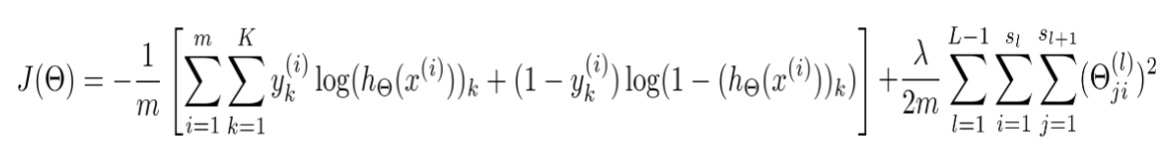

De todas formas, veremos que no cambia realmente mucho en cuanto a código: simplemente ahora las funciones *numpy* reciven matrices en donde antes se recivían vectores.

##### Corregir la implementación
Aquí, al igual que en la regresión logística, también hemos añadido un número muy pequeño `epsilon` para evitar hacer el logaritmo natural de 0.

Sin embargo, nos hemos encontrado con otro problema. A veces nos salían cálculos extraños de matrices con dimensiones muy raras, y nos hemos dado cuenta de que la función de coste no devolvía un número, si no una matriz de un sólo elemento. Por dentro, *numpy* trata de forma muy distinta a éstas dos cosas, por lo que nos tenemos que asegurar de que la salida sea en todo caso un número.

Para ello, hemos encontrado una función `np.squeeze`, que elimina dimensiones "de más" en las matrices. Ejemplos:
- `[[2,3]] -> [2,3]`
- `[[[1,2],[3,4]]] -> [[1,2],[3,4]]`
- `[[[[[1]]]]] -> 1` (Si tiene un solo elemento, devuelve el número solo)
- `[1,2,3] -> [1,2,3]` (Si la matriz no puede "estrujarse" más, no pasa nada)

In [31]:
def calcular_coste_red(act_capa_final, Y, parametros, lmbd):
    m = Y.shape[1]

    # Necesitamos la doble barra para hacer una división ENTERA, sin decimales.
    # No podemos tener 3.2 capas ocultas
    num_capas = len(parametros) // 2
    
    # Evitamos hacer el log de 0
    epsilon = 1e-15
    # act = activacion
    act_capa_final = np.clip(act_capa_final, epsilon, 1 - epsilon)
    
    # Calculamos la entropía cruzada.
    # Como hemos mencionado, ésto no cambia demasiado respecto a la de regresión,
    # pero hay que transponer en condiciones cada matriz si no queremos problemas.
    termino_y = np.dot(Y, np.log(act_capa_final).T)
    termino_uno_menos_y = np.dot(1-Y, np.log(1-act_capa_final).T)
    # Tenemos que poner los 1
    entropia_cruzada = -(1.0/m) * (termino_y+termino_uno_menos_y)
    
    # Calculamos la regularización como la suma de los cuadrados
    # de todos los pesos
    suma_pesos_cuadrados = 0
    for capa in range(1, num_capas + 1):
        suma_pesos_cuadrados += np.sum(np.square(parametros['P' + str(capa)]))

    # No podemos usar la palabra lambda en python, es reservada.
    # Por eso lo hemos llamado lmbd
    termino_regularizacion = (lmbd/(2*m)) * suma_pesos_cuadrados
    
    # CORRECCIÓN: Queremos devolver un número, no una matriz con
    # un colo elemento
    return np.squeeze(entropia_cruzada + termino_regularizacion)

#### *Backward Propagation*
Implementemos la función de *backward propagation* o "propagación de errores hacia atrás".

Ésta función permite corregir los errores que ha cometido cada neurona, dependiendo de cuanto error han cometido sus predecesoras.

In [32]:
def backward_propagation(act_capa_final, Y, act_anteriores, parametros, lmbd):
    gradientes = {}
    capas = len(parametros) // 2
    m = act_capa_final.shape[1]

    # Si no hacemos ésto, los cálculos petan
    Y = Y.reshape(act_capa_final.shape)
    
    # Derivada del coste respecto de la predicción, o "backdrop"
    # Una vez más, evitamos dividir por 0 usando epsilon:
    epsilon = 1e-15
    act_capa_final_clipeado = np.clip(act_capa_final, epsilon, 1-epsilon)

    # Calcularemos la derivada de la capa final
    d_act_capa_final = - (np.divide(Y, act_capa_final_clipeado) - np.divide(1 - Y, 1 - act_capa_final_clipeado))

    # Como recorremos las capas al revés,
    # nuestra primera iteración será sobre la última capa
    d_activacion_actual = d_act_capa_final
    act_actual = act_capa_final 
    
    # Loop desde la última capa (L) hasta la primera (1)
    for capa in reversed(range(1, capas + 1)):
        # Recuperamos valores del caché
        act_prev = act_anteriores['A'+str(capa-1)]
        P = parametros['P' + str(capa)]
        
        # Para calcular el error de la capa anterior,
        # debemos de coger la derivada de la función usada
        if capa == capas:
            d_funcion = act_actual * (1 - act_actual)
        else:
            d_funcion = d_relu(act_actual)
            
        error_capa = d_activacion_actual * d_funcion
        
        # Calculamos los gradientes
        # Ponemos unos decimales para poder tener floats
        dP = (1.0/m) * np.dot(error_capa, act_prev.T) + ((lmbd/m) * P)
        ds = (1.0/m) * np.sum(error_capa, axis=1, keepdims=True)
        
        # Calculamos la derivada de la activación
        # para la capa anterior para seguir el bucle
        if capa > 1:
            d_act_prev = np.dot(P.T, error_capa)
            d_activacion_actual = d_act_prev
            # Actualizamos la activación de la capa previa
            act_actual = act_prev 

        gradientes['dP' + str(capa)] = dP
        gradientes['ds' + str(capa)] = ds
        
    return gradientes

#### Funciones de actualización de parámetros
Usaremos la siguiente función para actualizar los parámetros con los gradientes calculados:

In [33]:
def actualizar_parametros(parametros, gradientes, tasa_aprendizaje):
    num_cols = len(parametros) // 2

    for col in range(1, num_cols + 1):
        parametros['P' + str(col)] -= tasa_aprendizaje * gradientes['dP' + str(col)]
        parametros['s' + str(col)] -= tasa_aprendizaje * gradientes['ds' + str(col)]

    return parametros

#### Función principal

La siguiente función hará de nexo con las otras. Aquí encontraremos el flujo de trabajo de nuestro modelo.

Vamos a resumir lo que ocurre aquí, ya que al fin y al cabo es el grueso del trabajo:
- Inicializamos los parámetros: Capas, neuronas por capas, sesgo, etc.
- Predecimos haciendo *Forward Propagation*.
- Calculamos el coste de la predicción.
- Calculamos los gradientes con el *Backward Propagation*.
- Actualizamos los parámetros, las zetas, con los gradientes calculados.
- Cada 100 iteraciones, actualizamos el historial.


In [34]:
def entrenar_red_neuronal(X_entr, Y_entr, X_val, Y_val, dimensiones_capas, tasa_aprendizaje=0.01, iteraciones=2000, intervalo_historial=100, lmbd=0.1, sesgo=0, valor_min=1, valor_max=10):
    # Inicializamos los parámetros con nuestra función inicial
    parametros = inicializar_parametros(dimensiones_capas, sesgo, valor_min, valor_max)
    
    historial_coste_entr = []
    historial_coste_val = []
    
    # Bucle de entrenamiento
    for i in range(iteraciones):
        
        # Forward propagation, predecimos
        act_ultima_capa, act_capas_anteriores = forward_propagation(X_entr, parametros)
        
        # Calculamos el coste
        coste_entr = calcular_coste_red(act_ultima_capa, Y_entr, parametros, lmbd)
        
        # Backward Propagation, calculamos los gradientes
        gradientes = backward_propagation(act_ultima_capa, Y_entr, act_capas_anteriores, parametros, lmbd)
        
        # Con los gradientes calculados, actualizamos los parámetros
        parametros = actualizar_parametros(parametros, gradientes, tasa_aprendizaje)
        
        # Historial y validación, según el intervalo definido
        if i % intervalo_historial == 0:
            # Para validación, hacemos un forward con los datos de validación
            # usando los parámetros actuales.
            
            # Recordemos que forward_propagation devuelve dos cosas:
            # La activación de la capa final y la anterior, y ésta última
            # no la necesitamos en ésta parte.
            act_capa_final_val, sin_uso = forward_propagation(X_val, parametros)
            coste_val = calcular_coste_red(act_capa_final_val, Y_val, parametros, lmbd)
            
            # Actualizamos los historiales
            historial_coste_entr.append(coste_entr)
            historial_coste_val.append(coste_val)
            
    return historial_coste_entr, historial_coste_val, parametros

#### Funciones de visualización de gráficos
Además, vamos a añadir funciones que nos permitan visualizar los datos que vamos recogiendo del entrenamiento:

In [35]:
def plot_historial(titulo, titulo_x, titulo_y, historial_entr, historial_val, intervalo_historial=100):
    sns.set(style="whitegrid")

    # Si queremos que los índices se correspondan
    # a los reales al momento de entrenar el modelo,
    # debemos de calcularlos.
    indices_iteraciones = [i * intervalo_historial for i in range(len(historial_entr))]
    
    plt.figure(figsize=(10, 6))
    plt.plot(indices_iteraciones, historial_entr, color='blue', linewidth=2, label='Coste Entrenamiento')
    plt.plot(indices_iteraciones, historial_val, color='orange', linewidth=2, label='Coste Validación')
    
    plt.title(titulo, fontsize=16)
    plt.xlabel(titulo_x, fontsize=12)
    plt.ylabel(titulo_y, fontsize=12)
    plt.legend()
    plt.show()

#### Función para mostrar métricas
También crearemos una función para mostrar las métricas requeridas. Éstas serán:
- Matríz de confusión: Nos ayudará a contrastar los casos reales con los predichos.
- Precisión: Tasa de acierto de la red neuronal.
- Sensibilidad o *recall*: Mide el porcentaje de los valores positivos (en éste caso, que un paciente sí sea de alto riesgo) que el modelo es capaz de detectar.
- *F1-Score*: Indica cual es el equilibrio existente entre la precisión y la sensibilidad.

In [36]:
def calcular_matriz_confusion_metricas_red(X, y, modelo, umbral_activacion = 0.5):
    # Predecimos
    probabilidades, sin_uso = forward_propagation(X, modelo)  

    # Convertimos probabilidades a uno o cero.
    # Aquí usaremos un umbral recibido por parámetro, para
    # poder hacer ciertas comprobaciones más adelante.
    y_pred = (probabilidades > umbral_activacion).astype(int)
    
    # Calculamos los componentes de la matriz:
    vn = np.sum((y == 0) & (y_pred == 0))
    fp = np.sum((y == 0) & (y_pred == 1))
    fn = np.sum((y == 1) & (y_pred == 0))
    vp = np.sum((y == 1) & (y_pred == 1))

    # Calculamos el recall.
    # Por si acaso, comprobamos que no vayamos a dividir
    # por 0.
    if (vp + fn) > 0:
        recall = vp / (vp + fn)
    else:
        recall = 0.0

    # Calculamos la precisión
    # También hacemos la misma comprobación que en el recall
    if (vp + fp) > 0:
        precision = vp / (vp + fp)
    else:
        precision = 0.0
    # Calculamos el F1-Score, que usaremos más tarde
    if (precision + recall) > 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = 0
    
    # Construimos la matriz
    matriz = np.array([[vn, fp], [fn, vp]])
    
    # Definimos el tamaño de la matriz
    plt.figure(figsize=(6, 5))
    
    # Creamos el mapa de calor, con sus respectivas
    # anotaciones.
    # Con fmt='d' nos aseguramos de que los números se muestren
    # como int, no como float.
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicho Negativo (0)', 'Predicho Positivo (1)'],
                yticklabels=['Real Negativo (0)', 'Real Positivo (1)'])
    
    plt.title('Matriz de Confusión', fontsize=15)
    plt.ylabel('Realidad', fontsize=12)
    plt.xlabel('Predicción', fontsize=12)
    plt.show()
    
    print('[RESULTADOS]')
    print('Verdaderos Negativos (VN):', vn)
    print('Falsos Positivos (FP):', fp)
    print('Falsos Negativos (FN):', fn)
    print('Verdaderos Positivos (VP):', vp)
    print('\n[MÉTRICAS]')
    print('Recall o Sensibilidad (%):', recall*100)
    print('Precisión (%):', precision*100)
    print('F1-Score (%):', f1_score*100)

### Entrenamiento

Ahora que ya tenemos todas las funciones implementadas, tenemos que entrenar el modelo haciendo uso de las mismas.

#### Método de entrenamiento

A la hora de decidir que método de entrenamiento vamos a usar, tenemos que tener en cuenta el tamaño del datosset. Por regla general, la validación cruzada es preferible en datossets pequeños (unas 10.000 filas o menos), mientras que el *hold-out* es más que suficiente en datossets medianos-grandes (más de 50.000 filas).

Por tanto, consideramos que el *hold-out* es el más adecuado. En éste datosset, si cogemos el 30% para pruebas, nuestro conjunto de prueba sería de 30.000 filas, lo cual consideramos que es bastante representativo.
Además, si quisiésemos hacer validación cruzada de, por ejemplo, *5-fold*, tendríamos que entrenar éste modelo 5 veces, y para nuestros recursos actuales (portátiles de estudio) consideramos que es demasiado, ya que tendríamos que entrenar y validar 500.000 filas.
En conclusión: usaremos *hold-out*.

Primero, vamos a dividir el datosset en datos de entrenamiento y datos de prueba. En concreto, usaremos el 70% del datosset para entrenamiento y el 30% para test. 
Tambien subdividiremos los datos de entrenamiento en un conjunto de entrenamiento y uno de validación, con el mismo ratio 70% - 30%. Cabe destacar que, además, vamos a transponer los datosset para que casen con la implementación de la red neuronal.

In [37]:
# Barajamos los datos en base a un random state.
# Así, podemos probar distintos conjuntos de entrenamietno y
# validación con sólo cambiar ese valor.
# frac=1 sirve para tomar el datosset entero (fracción entera = 1)
datos_random = datos_entr.sample(frac=1, random_state=42).reset_index(drop=True)

X = datos_random.drop(columns=[columna_objetivo]).values
y = datos_random[columna_objetivo].values

# Añadimos la columna de sesgo (bias) al datosset, al principio del mismo.
m_total = len(y)
# np.c_ nos ayuda a concatenar datossets (y arrays, series y demás),
# así que lo usamos para la columna llena de unos que tendrá el bias
X = np.c_[np.ones((m_total, 1)), X]

# Corte 1: Del total, 70% para el total de entrenamiento, 
# 30% para el conjunto de pruebas.

# Calculamos los índices por los que vamos a hacer el corte 70%-30%
corte_total_entr = int(0.7 * m_total)
corte_pruebas = m_total - corte_total_entr # El resto

# Separamos el conjunto total de entrenamiento
# del de test.

X_total_entr = X[:corte_total_entr]
y_total_entr = y[:corte_total_entr]

# Debido a cómo hemos programado las funciones de la red neuronal,
# tenemos que transponer todo lo que reciban las funciones de 
# la misma (forward_propagation, etc)
X_test = (X[corte_total_entr:]).T
y_test = (y[corte_total_entr:]).reshape(1,-1)

# Corte 2: Del conjunto total de entrenamiento, 70% para entrenar,
# 30% para validar
corte_entr = int(0.7 * len(y_total_entr))
corte_val = len(y_total_entr) - corte_entr

X_entr = (X_total_entr[:corte_entr]).T
y_entr = (y_total_entr[:corte_entr]).reshape(1,-1)

X_val = (X_total_entr[corte_entr:]).T
y_val = (y_total_entr[corte_entr:]).reshape(1,-1)

print("[DIMENSIONES DE LOS CONJUNTOS]")
print("- Entrenamiento:", X_entr.shape)
print("- Validación:", X_val.shape)
print("- Pruebas/Test:",X_test.shape)

[DIMENSIONES DE LOS CONJUNTOS]
- Entrenamiento: (13, 49000)
- Validación: (13, 21000)
- Pruebas/Test: (13, 30000)


#### Modificaciones

En éste cuaderno entran en juego las modificaciones indicadas en el trabajo.

Primero, tenemos que **probar las distintas arquitecturas** propuestas:
- **Pequeña**: 1 capa oculta, 8 neuronas.
- **Media**: 1 capa oculta, 64 neuronas.
- **Profunda**: 2 capas ocultas, 64 + 32 neuronas.

Todas éstas arquitecturas tendrán cosas en común:
- 1 capa de salida que constará de una sola neurona.
- 13 entradas, una por cada columna seleccionada del datosset.

Segundo, seleccionaremos la arquitectura que mejor se ajuste a nuestro modelo y haremos pruebas sobre alteraciones en los parámetros:
- Tasa de aprendizaje: Probaremos con los valores `[0.0001, 0.001, 0.01, 0.1]`
- Inicialización de los pesos: Inicializar todo a cero, a valores pequeños aleatorios y a valores grandes aleatorios
- Número de iteraciones/épocas: Probaremos 10, 50, 200

Y por último, responderemos a ciertas preguntas relacionadas con las modificaciones de cada parámetro y haremos un análisis en profundidad de los errores que comete la red neuronal, haciendo uso de matriz de confusión y de otras métricas mostradas en la regresión logística.

### Arquitecturas
Empecemos probando las arquitecturas propuestas.

Para ello, todas tendrán en común:
- Tasa de aprendizaje
- Número de iteraciones
- Sesgo
- Parámetros iniciales aleatorios

Volviendo a la inicialización de hiperparámetros:

In [38]:
tasa_aprendizaje = 0.1
num_iter = 200
intervalo_historial = num_iter / 5
lmbd = 0.01
sesgo = 0
valor_min = 0.01
valor_max = 1

#### Arquitectura pequeña

La arquitectura mediana consta de:
- 13 entradas.
- 1 capa oculta.
- 8 neuronas en dicha capa.

Inicialicemos los hiperparámetros restantes y entrenemos al modelo:

In [39]:
# Hay 13 entradas (las mismas que columnas),
# una capa oculta con 8 neuronas y 1 salida.
dimensiones_capas = [13,8,1]

print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    # (el min y el max son para los valores aleatorios)
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 5.31 segundos


Nuestro modelo se ha entrenado en relativamente poco tiempo, aunque ha tardado bastante más que en la regresión logística. Veamos su desempeño en el resto de métricas:

##### Gráfico de convergencia

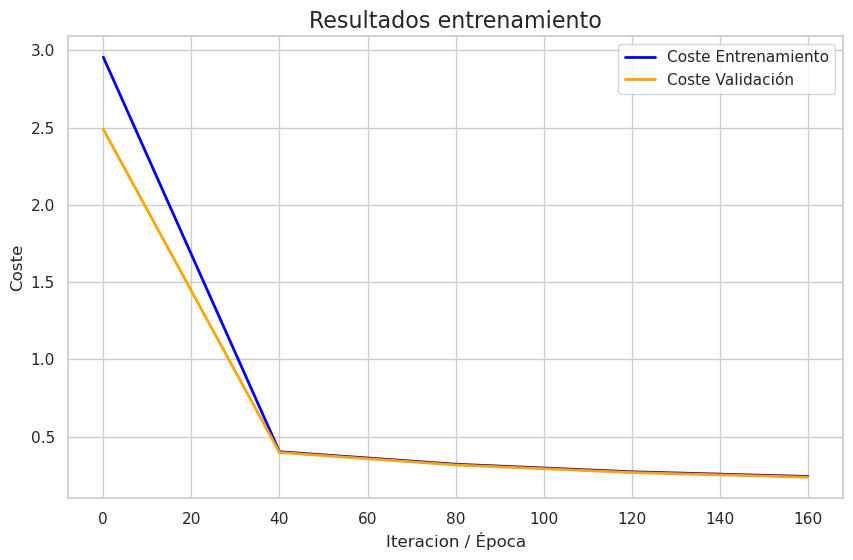

In [40]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

El modelo para converger muy rápidamente, estabilizándose tras las 40 iteraciones. Pese a estabilizarse, aún así parece que podría seguir disminuyendo el coste si le diésemos algunas iteraciones más.

##### Matríz de confusión, precisión, sensibilidad y F1-Score
Calculemos también su matriz de confusión, junto con otra serie de métricas que explicaremos más tarde. En la matriz de confusión mostraremos:
- **Verdaderos Negativos (VN)**: Real 0, Predicho 0
- **Falsos Positivos (FP)**: Real 0, Predicho 1
- **Falsos Negativos (FN)**: Real 1, Predicho 0
- **Verdaderos Positivos (FP)**: Real 1, Predicho 1

Para ello, usaremos la función declarada anteriormente:

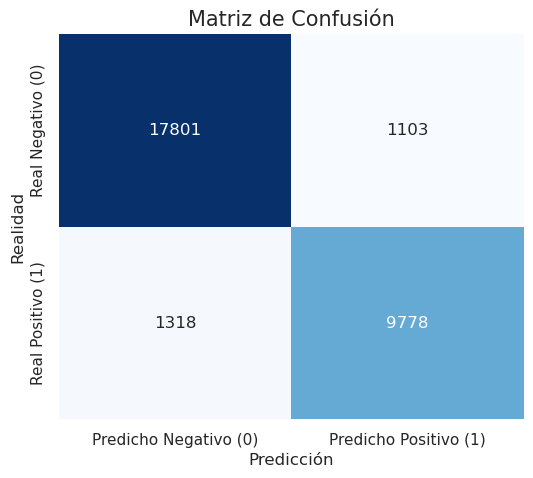

[RESULTADOS]
Verdaderos Negativos (VN): 17801
Falsos Positivos (FP): 1103
Falsos Negativos (FN): 1318
Verdaderos Positivos (VP): 9778

[MÉTRICAS]
Recall o Sensibilidad (%): 88.12184571016583
Precisión (%): 89.86306405661244
F1-Score (%): 88.98393775310551


In [41]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

Nuestra red neuronal está bastante equilibrada: rondando el 88% en todas las métricas.

Aquí nos encontramos con el mismo problema que en la regresión logística, y es el mismo problema que nos vamos a encontrar en el resto de redes neuronales: bajo el contexto médico, decirle al 12% de pacientes que son de riesgo que no lo son es una barbaridad. Y de nuevo, ésto tiene la misma solución: Bajar el umbral de activación hasta que tengamos las métricas, sobretodo la sensibilidad, deseadas.

#### Arquitectura mediana

La arquitectura mediana consta de:
- 13 entradas.
- 1 capa oculta.
- 64 neuronas en dicha capa.

Inicialicemos los parámetros restantes y entremos al modelo:

In [42]:
# Hay 13 entradas (las mismas que columnas),
# una capa oculta con 64 neuronas y 1 salida.
dimensiones_capas = [13,64,1]

print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 24.16 segundos


Éste modelo ha tardado en entrenarse unas 6-7 veces más que el anterior. Veamos como van sus métricas:

##### Gráfico de convergencia

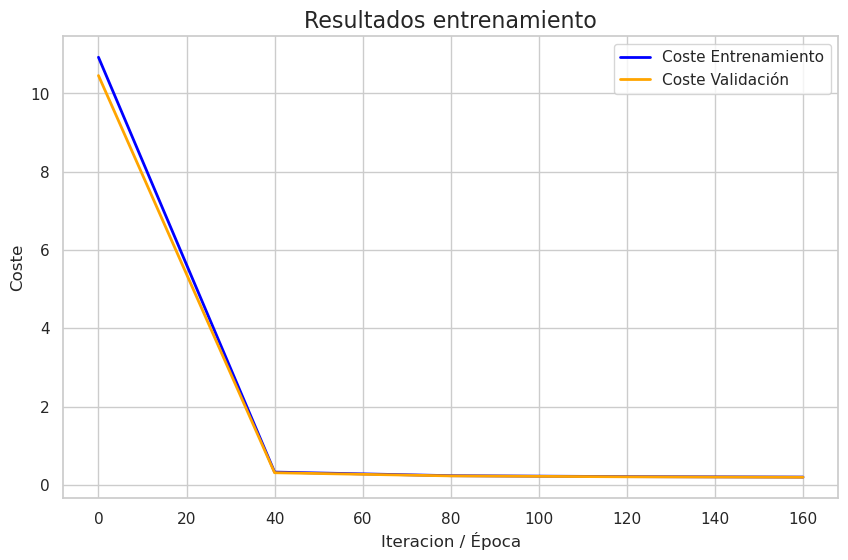

In [43]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

Éste modelo parece tener una convergencia parecida al modelo anterior, se estabiliza entorno a las 40 iteraciones.

##### Matríz de confusión, precisión, sensibilidad y F1-Score

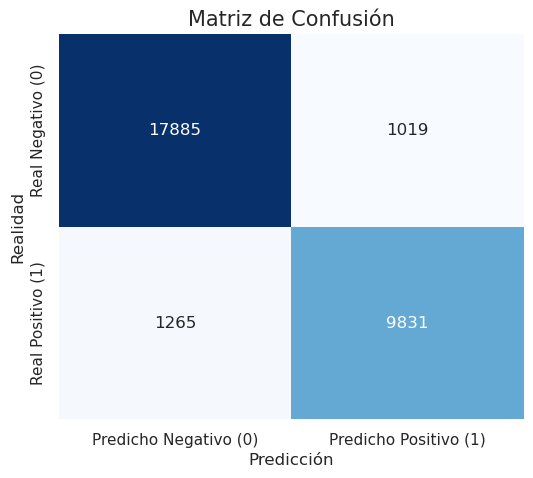

[RESULTADOS]
Verdaderos Negativos (VN): 17885
Falsos Positivos (FP): 1019
Falsos Negativos (FN): 1265
Verdaderos Positivos (VP): 9831

[MÉTRICAS]
Recall o Sensibilidad (%): 88.59949531362653
Precisión (%): 90.60829493087557
F1-Score (%): 89.59263647133875


In [44]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

WIP

#### Arquitectura profunda

La arquitectura mediana consta de:
- 13 entradas.
- 2 capas ocultas.
- 64 neuronas en la primera capa.
- 32 en la segunda capa.

Inicialicemos los parámetros restantes y entremos al modelo:

In [45]:
# Hay 13 entradas (las mismas que columnas),
# una capa oculta con 64 neuronas y 1 salida.
dimensiones_capas = [13,64,32,1]

print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 31.01 segundos


Éste modelo, pese a tener una capa adicional al anterior, no ha tardado mucho más en entrenarse.

##### Gráfico de convergencia

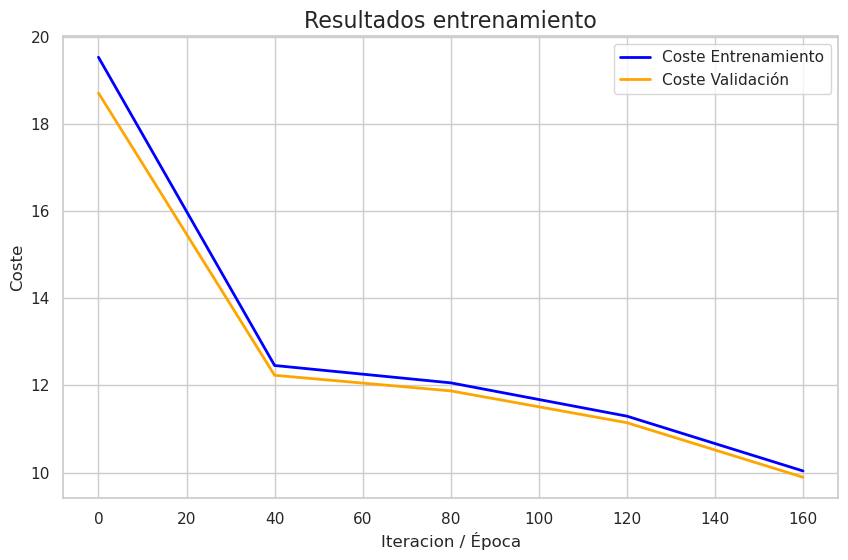

In [46]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

Éste modelo parece tener muchas más dificultades para estabilizar la convergencia. Es cierto que baja significativamente, pero no alcanza la velocidad de los modelos anteriores.

##### Matríz de confusión, precisión, sensibilidad y F1-Score

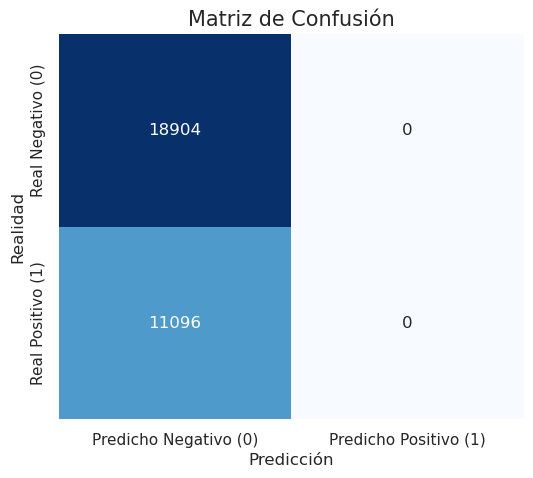

[RESULTADOS]
Verdaderos Negativos (VN): 18904
Falsos Positivos (FP): 0
Falsos Negativos (FN): 11096
Verdaderos Positivos (VP): 0

[MÉTRICAS]
Recall o Sensibilidad (%): 0.0
Precisión (%): 0.0
F1-Score (%): 0


In [47]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

Además no solo tiene el modelo una baja precisión, si no que tiene un recall que deja mucho que desear. Éste modelo, en teoría, tiene mucha más capacidad de aprendizaje que los otros, ya que tiene muchas más neuronas y podría reconocer patrones más complejos, pero seguramente necesite muchas más iteraciones y, por tanto, tiempo.

#### Arquitectura escogida

Respondamos a las preguntas del enunciado del trabajo:
- ¿Cómo influye en el coste computacional?

Los dos primeras redes neuronales llegan prácticamente al mismo coste (siendo el modelo mediano el mejor de los dos), mientras que el modelo profundo parece tener mayor dificultad alcanzando la velocidad de convergencia de los anteriores.

- ¿Qué arquitectura tiene mayor capacidad de representación?

La arquitectura con **mayor capacidad de representación teórica** sería el modelo de **arquitectura profunda**. Al tener muchos más parámetros, sería capaz de aprender patrones bastante más complejos y ajustarse mejor.

Sin embargo, hemos comprobado que **para éste problema, que no es demasiado complejo, puede ser demasiado**. En las pruebas, se ha demostrado que **la arquitectura mediana tiene mucho mejor equilibrio complejidad-rendimiento para éste problema que la profunda**, por lo que en nuestro caso, la arquitectura con mayor capacidad de representación es la mediana.

- ¿Se observa alguna tendencia al sobreajuste en relación con la complejidad de la arquitectura de red?

En un principio, **no parece haber una relación clara**, al menos **en las pruebas obtenidas**. Teóricamente, cuanto más complejo es el modelo, más facilidad tiene para tender al overfitting, ya que es mucho más capaz de "memorizar" su conjunto de entrenamiento que una arquitectura más simple como puede ser nuestra arquitectura pequeña.

*CONCLUSIÓN*: **La arquitectura escogida es la arquitectura mediana**.

#### Análisis de la tasa de aprendizaje
Procedamos al análisis de la tasa de aprendizaje. Para ello, vamos a probar con las siguientes tasas:
- `0.001`, bastante baja.
- `0.01`, más intermedia.
- `0.1`, la cual nos ha funcionado bastante bien.
- `2.0`, 20 veces más que la mejor hasta ahora.
- `5.0`, 50 veces más.

Hemos decidido añadir otro test con la taza de aprendizaje a `2.0` ya que el modelo seguía mejorando al usar la tasa de aprendizaje de 0.5, y nos gustaría ver los potenciales efectos negativos de aumentar la tasa.

Ahora, vamos a establecer las carácterísticas comunes, y luego haremos los análisis por separado:

In [48]:
dimensiones_capas = [13,64,1]
num_iter = 200
intervalo_historial = num_iter / 5
lmbd = 0.01
sesgo = 0
valor_min = 0.01
valor_max = 1

##### Tasa de aprendizaje 0.001

In [49]:
tasa_aprendizaje = 0.001

print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 18.75 segundos


##### Gráfico de convergencia

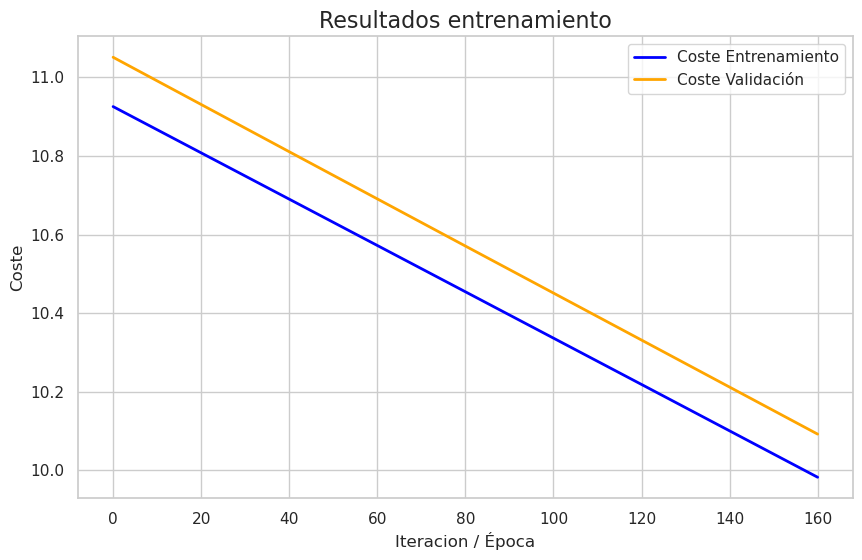

In [50]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

##### Matríz de confusión, precisión, sensibilidad y F1-Score

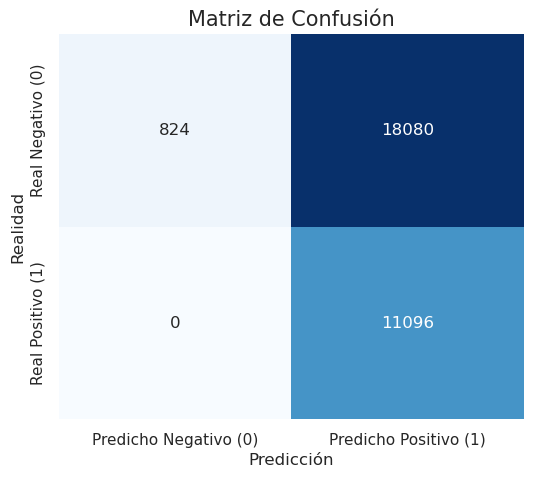

[RESULTADOS]
Verdaderos Negativos (VN): 824
Falsos Positivos (FP): 18080
Falsos Negativos (FN): 0
Verdaderos Positivos (VP): 11096

[MÉTRICAS]
Recall o Sensibilidad (%): 100.0
Precisión (%): 38.031258568686596
F1-Score (%): 55.10528406833532


In [51]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

##### Tasa de aprendizaje 0.01

In [52]:
tasa_aprendizaje = 0.01

print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 18.19 segundos


##### Gráfico de convergencia

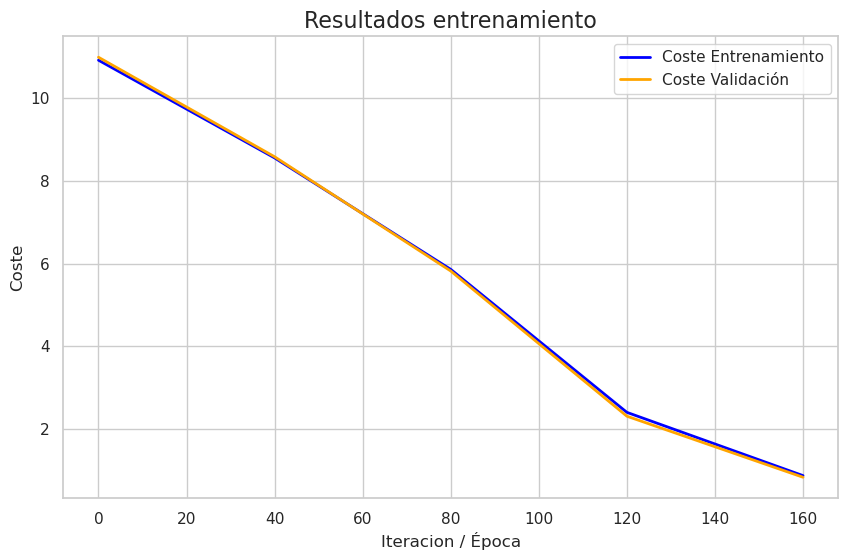

In [53]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

##### Matríz de confusión, precisión, sensibilidad y F1-Score

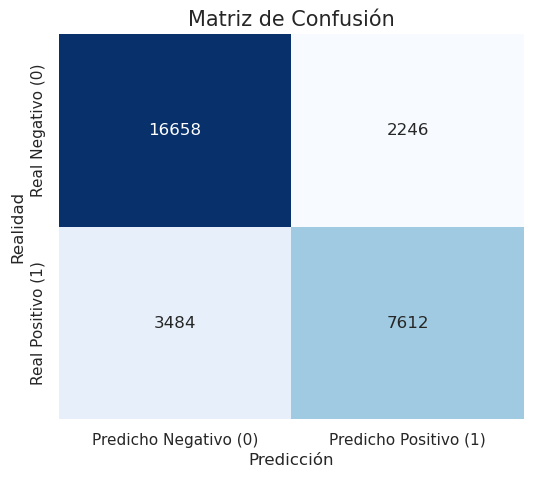

[RESULTADOS]
Verdaderos Negativos (VN): 16658
Falsos Positivos (FP): 2246
Falsos Negativos (FN): 3484
Verdaderos Positivos (VP): 7612

[MÉTRICAS]
Recall o Sensibilidad (%): 68.60129776496035
Precisión (%): 77.21647392980321
F1-Score (%): 72.6543857974611


In [54]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

##### Tasa de aprendizaje 0.1

In [55]:
tasa_aprendizaje = 0.1

print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 18.25 segundos


##### Gráfico de convergencia

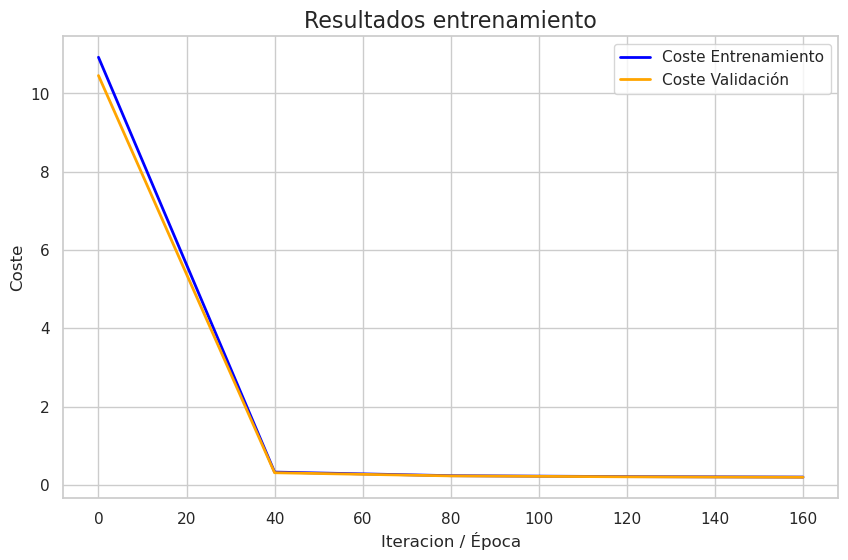

In [56]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

##### Matríz de confusión, precisión, sensibilidad y F1-Score

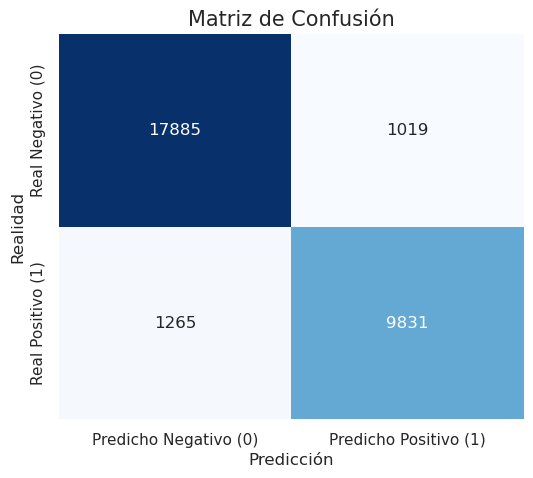

[RESULTADOS]
Verdaderos Negativos (VN): 17885
Falsos Positivos (FP): 1019
Falsos Negativos (FN): 1265
Verdaderos Positivos (VP): 9831

[MÉTRICAS]
Recall o Sensibilidad (%): 88.59949531362653
Precisión (%): 90.60829493087557
F1-Score (%): 89.59263647133875


In [57]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

##### Tasa de aprendizaje 2

In [58]:
tasa_aprendizaje = 2.0

print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 18.18 segundos


##### Gráfico de convergencia

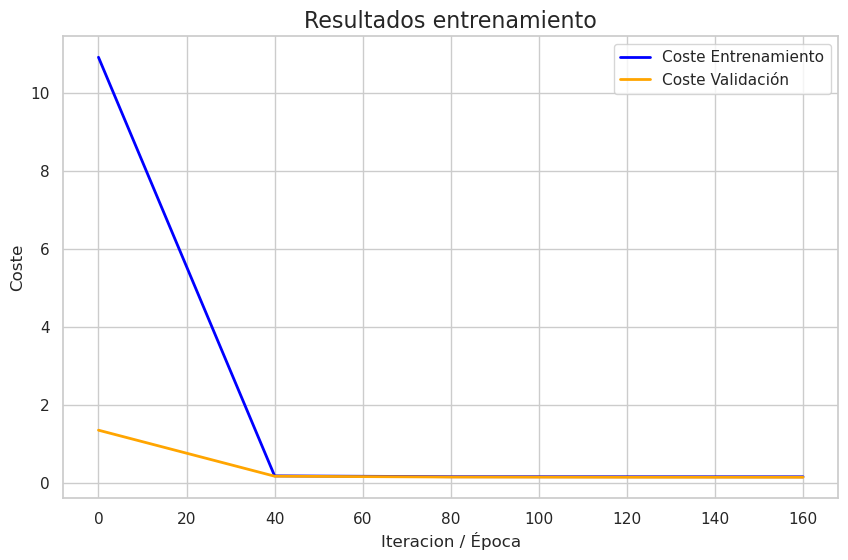

In [59]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

##### Matríz de confusión, precisión, sensibilidad y F1-Score

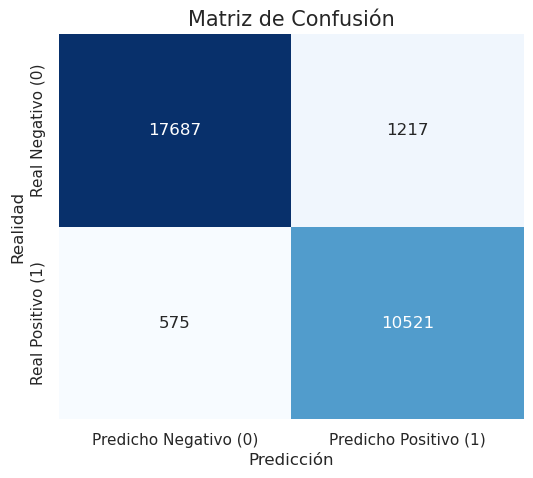

[RESULTADOS]
Verdaderos Negativos (VN): 17687
Falsos Positivos (FP): 1217
Falsos Negativos (FN): 575
Verdaderos Positivos (VP): 10521

[MÉTRICAS]
Recall o Sensibilidad (%): 94.8179524152848
Precisión (%): 89.63196455955018
F1-Score (%): 92.15205395462905


In [60]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

##### Tasa de aprendizaje 5

In [61]:
tasa_aprendizaje = 5.0

print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 18.39 segundos


##### Gráfico de convergencia

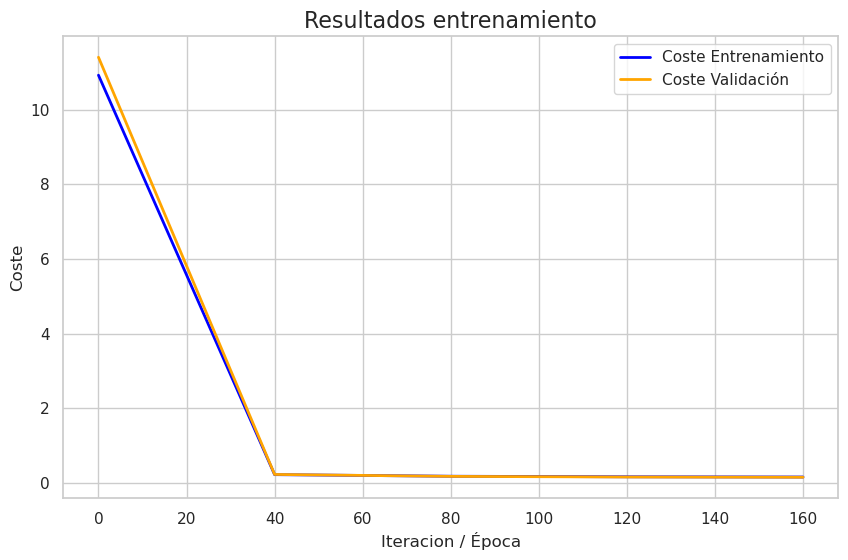

In [62]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

##### Matríz de confusión, precisión, sensibilidad y F1-Score

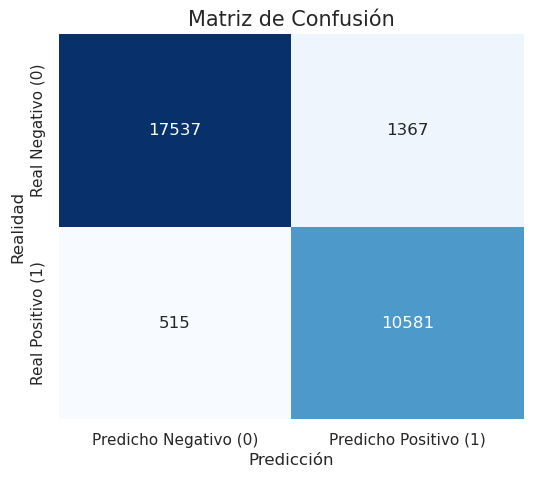

[RESULTADOS]
Verdaderos Negativos (VN): 17537
Falsos Positivos (FP): 1367
Falsos Negativos (FN): 515
Verdaderos Positivos (VP): 10581

[MÉTRICAS]
Recall o Sensibilidad (%): 95.358687815429
Precisión (%): 88.55875460328089
F1-Score (%): 91.83301510154487


In [63]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

##### Discusión de la tasa de aprendizaje

Hay varias conclusiones que pueden sacarse mirando los gráficos y las métricas:
- **La velocidad de convergencia aumenta con la tasa**: Hemos comprobado que ambas cosas parecen ser **directamente proporcionales, hasta que se pasa un umbral**.
- **Hay un punto de estabilización**: A partir de 0.1 de tasa, todos se estabilizan a las 40 iteraciones.
- **Curiosamente, no hemos llegado a romper la gráfica**: Si nos pasamos con el learning rate, deberíamos tener una gráfica mucho más inestable, pudiéndose empeorar el modelo entre una iteración y otra, pero no se ha dado el caso.
- **El F1-Score ha empeorado a partir de cierta tasa**: Curiosamente, hemos comprobado que una tasa de 2.0 ha mejorado significativamente el modelo, con un F1-Score del 93%. Sin embargo, con 5.0 hemos visto que el modelo perdía calidad en éste punto, pese a mejorar su sensibilidad. Ésto nos sugiere que tasas mayores a 5.0 traerían problemas a la hora de entrenar el modelo.

#### Análisis de la inicialización de los pesos
Procedamos al análisis de la inicialización de los pesos. Para ello, vamos a probar con los siguientes:

- Todo ceros.
- Pequeños valores aleatorios comprendidos en `(-0.1, 0.1)`
- Grandes valores aleatorios

In [64]:
dimensiones_capas = [13,64,1]

tasa_aprendizaje = 0.1
num_iter = 200
intervalo_historial = num_iter / 5
lmbd = 0.01
sesgo = 0

##### Valores iniciales a 0

In [65]:
valor_min = 0.0
valor_max = 0.0

print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 19.39 segundos


##### Gráfico de convergencia

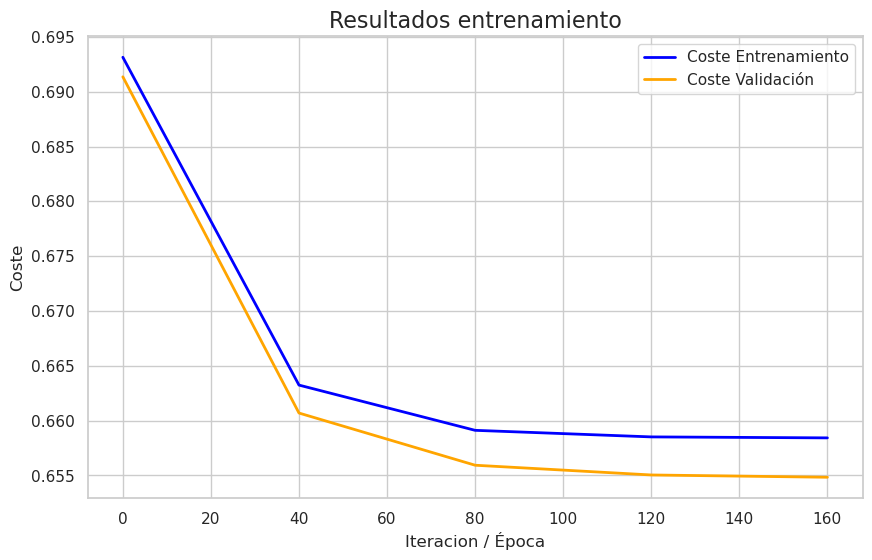

In [66]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

##### Matríz de confusión, precisión, sensibilidad y F1-Score

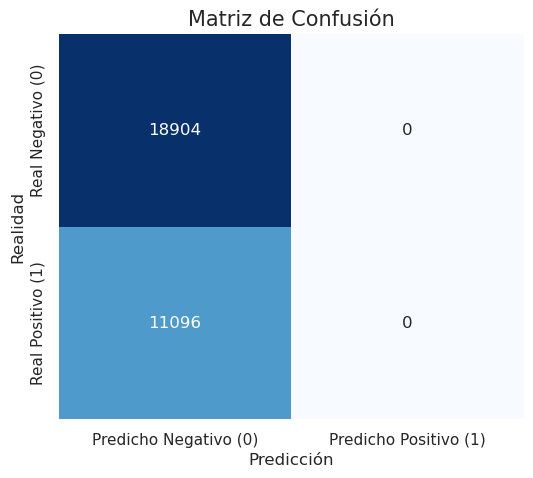

[RESULTADOS]
Verdaderos Negativos (VN): 18904
Falsos Positivos (FP): 0
Falsos Negativos (FN): 11096
Verdaderos Positivos (VP): 0

[MÉTRICAS]
Recall o Sensibilidad (%): 0.0
Precisión (%): 0.0
F1-Score (%): 0


In [67]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

##### Pequeños valores aleatorios

In [68]:
valor_min = -0.1
valor_max = 0.1

print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 19.49 segundos


##### Gráfico de convergencia

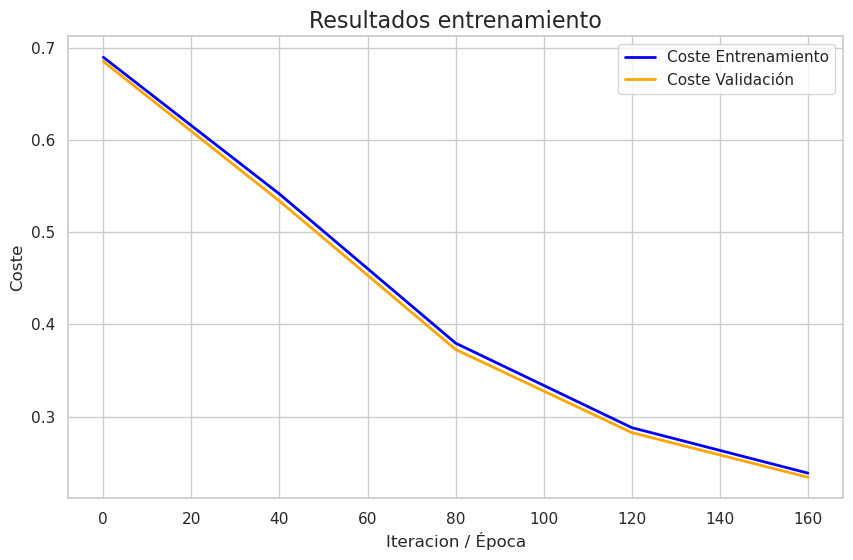

In [69]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

##### Matríz de confusión, precisión, sensibilidad y F1-Score

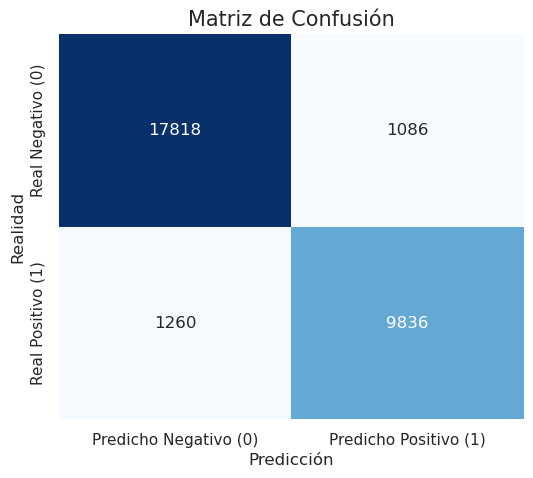

[RESULTADOS]
Verdaderos Negativos (VN): 17818
Falsos Positivos (FP): 1086
Falsos Negativos (FN): 1260
Verdaderos Positivos (VP): 9836

[MÉTRICAS]
Recall o Sensibilidad (%): 88.64455659697188
Precisión (%): 90.05676616004395
F1-Score (%): 89.34508129712053


In [70]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

##### Grandes valores aleatorios

In [71]:
valor_min = 10000.0
valor_max = 100000.0

print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 17.78 segundos


##### Gráfico de convergencia

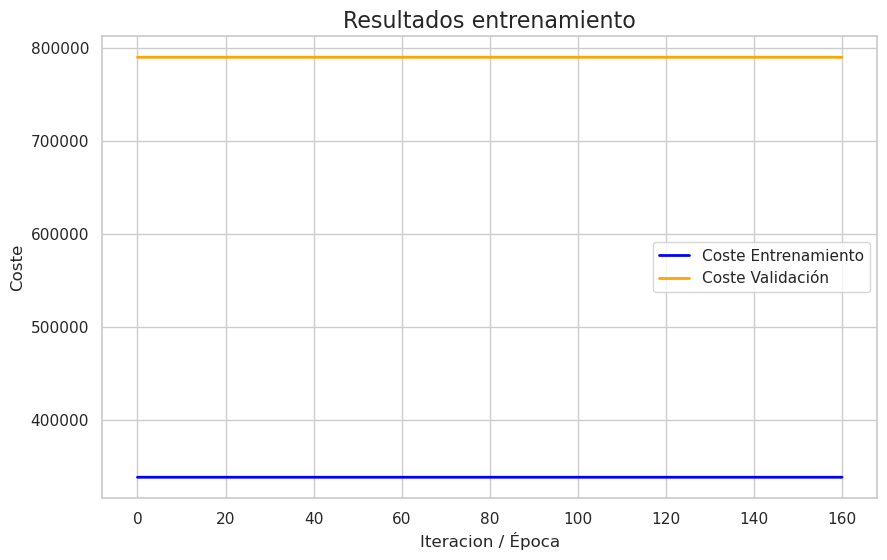

In [72]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

##### Matríz de confusión, precisión, sensibilidad y F1-Score

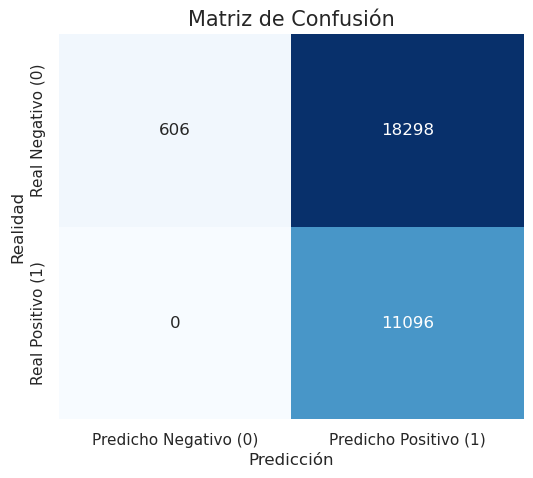

[RESULTADOS]
Verdaderos Negativos (VN): 606
Falsos Positivos (FP): 18298
Falsos Negativos (FN): 0
Verdaderos Positivos (VP): 11096

[MÉTRICAS]
Recall o Sensibilidad (%): 100.0
Precisión (%): 37.749200517112335
F1-Score (%): 54.80859471474439


In [73]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

##### Discusión de la inicialización de los pesos

Hay varias conclusiones que pueden sacarse mirando los gráficos y las métricas:

- **Inicializar los pesos a 0 crea un modelo "perezoso"**: En la matriz de confusión, nuestro modelo ha respondido que ningún paciente es de riesgo. Ésto se debe a que, con los pesos inicializados a 0, todas las activaciones son 0 y el modelo no puede aprender. Y, como "no ser de riesgo" está codificado con un 0, el modelo ha acabado dando ésta respuesta.
- **Inicializar los pesos a valores pequeños ha funcionado muy bien**: El modelo ha sido capaz de aprender adecuadamente, llegando a un 89% de F1-Score.
- **Inicializar los pesos a valores muy altos hace que el modelo aprenda mal**: Hemos observado que inicializar los pesos a valores muy alto empeora significativamente el aprendizaje del modelo. Aquí ocurre un caso parecido a inicializarlo todo a 0: como los pesos son altísimos, la mayoría de valores resultantes suelen ser cercanos a 1, por lo que en la mayoría de los casos el modelo ha respondido con que el paciente es de riesgo. Eso sí, al ser valores distintos de 0, el modelo ha podido aprender ligeramente.

#### Análisis de curva de aprendizaje
Procedamos al análisis de la curva de aprendizaje. Para ello, vamos a probar con distintos números de iteraciones:
- `50`, pocas iteraciones.
- `200`, el valor usado hasta ahora.
- `1000`, bastantes más que las usadas.

Antes de nada, vamos a establecer las carácterísticas comunes, y luego haremos los análisis por separado:

In [74]:
dimensiones_capas = [13,64,1]

tasa_aprendizaje = 0.1
intervalo_historial = num_iter / 5
lmbd = 0.01
sesgo = 0
valor_min = 0.01
valor_max = 1

##### 50 iteraciones

In [75]:
num_iter = 50

print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 4.60 segundos


##### Gráfico de convergencia

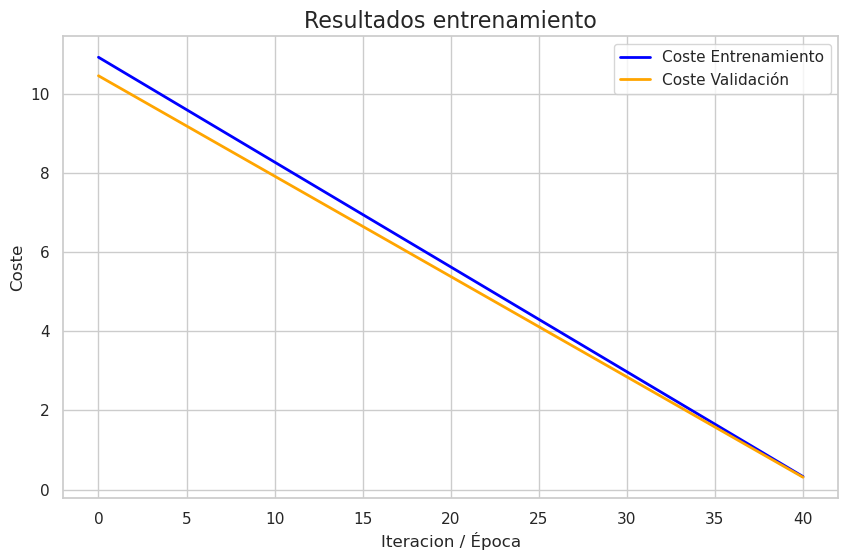

In [76]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

##### Matríz de confusión, precisión, sensibilidad y F1-Score

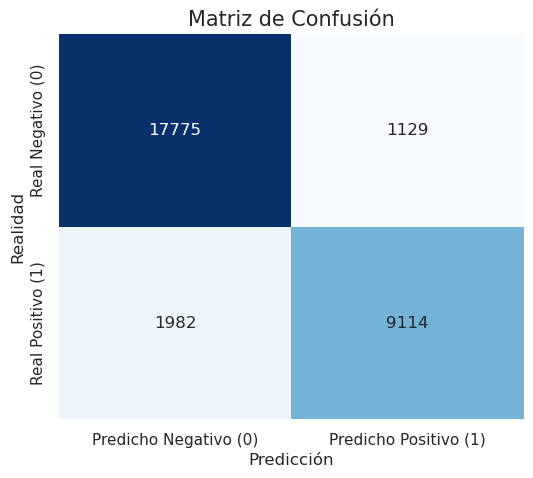

[RESULTADOS]
Verdaderos Negativos (VN): 17775
Falsos Positivos (FP): 1129
Falsos Negativos (FN): 1982
Verdaderos Positivos (VP): 9114

[MÉTRICAS]
Recall o Sensibilidad (%): 82.13770728190339
Precisión (%): 88.97783852386996
F1-Score (%): 85.42106003092928


In [77]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

##### 200 iteraciones

In [78]:
num_iter = 200

print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 18.57 segundos


##### Gráfico de convergencia

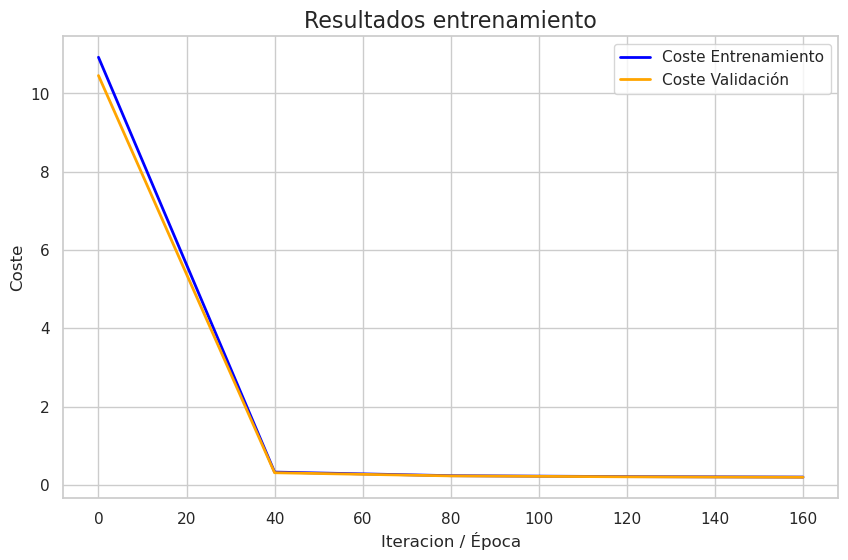

In [79]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

##### Matríz de confusión, precisión, sensibilidad y F1-Score

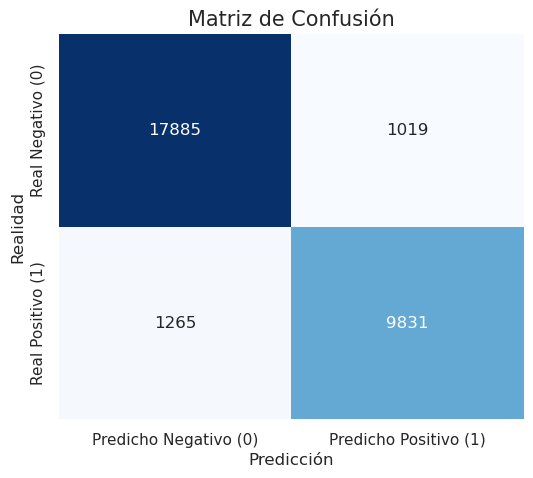

[RESULTADOS]
Verdaderos Negativos (VN): 17885
Falsos Positivos (FP): 1019
Falsos Negativos (FN): 1265
Verdaderos Positivos (VP): 9831

[MÉTRICAS]
Recall o Sensibilidad (%): 88.59949531362653
Precisión (%): 90.60829493087557
F1-Score (%): 89.59263647133875


In [80]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

##### 1000 iteraciones

In [81]:
num_iter = 1000

print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 90.13 segundos


##### Gráfico de convergencia

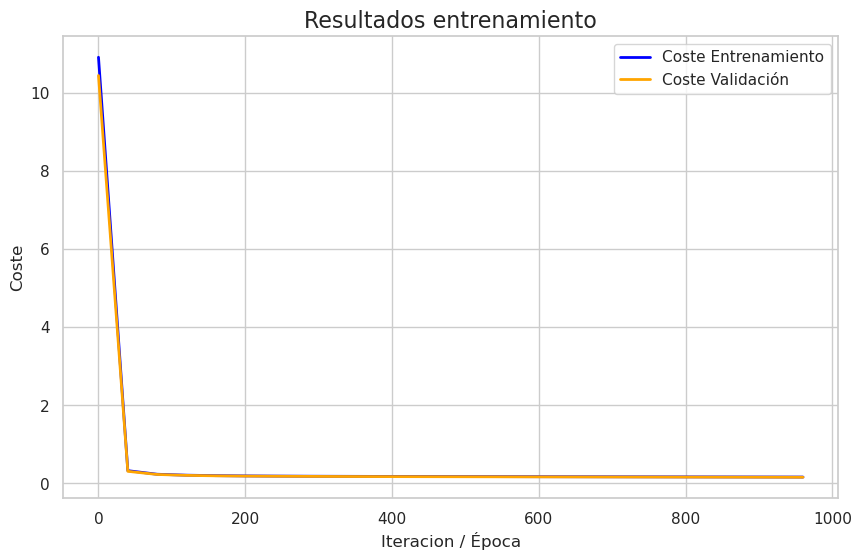

In [82]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

##### Matríz de confusión, precisión, sensibilidad y F1-Score

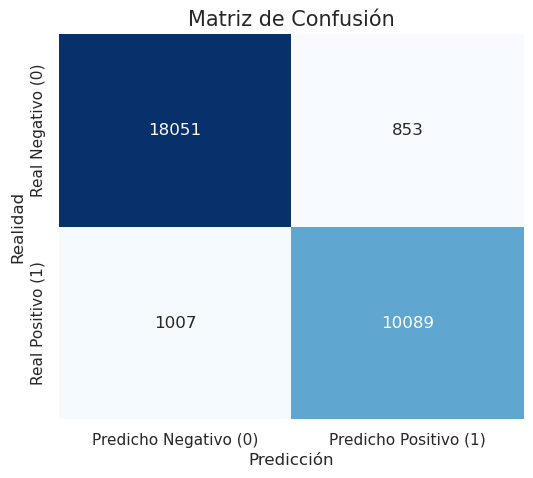

[RESULTADOS]
Verdaderos Negativos (VN): 18051
Falsos Positivos (FP): 853
Falsos Negativos (FN): 1007
Verdaderos Positivos (VP): 10089

[MÉTRICAS]
Recall o Sensibilidad (%): 90.92465753424658
Precisión (%): 92.20435021019924
F1-Score (%): 91.56003267084128


In [83]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

##### Discusión del número de iteraciones

Hay varias conclusiones que pueden sacarse mirando los gráficos y las métricas:

- **El modelo no empeora en ningún caso**: Dentro de las iteraciones probadas, el modelo no ha empeorado. Éste tiene sentido, ya que el número de iteraciones simplemente le da más tiempo para aprender, así que mientras pueda hacerlo correctamente, no debería afectar.
- **Más tiempo no significa mayor mejora proporcional**: Pese a que el mejor modelo es aquel que ha tenido 1000 iteraciones para aprender, ha tardado 5 veces más que el de 200 iteraciones (lo cuál es lógico mirando a ambos números), y solo ha conseguido un 2% más de F1-Score.

#### Análisis de los errores cometidos por la red neuronal
Para éste análisis vamos a ejecutar el mejor modelo obtenido, y vamos a estudiar los resultados dados.

Inicialicemos parámetros:

In [84]:
tasa_aprendizaje = 2.0
num_iter = 200
intervalo_historial = num_iter / 5
lmbd = 0.01
sesgo = 0
valor_min = -0.01
valor_max = 0.01

Y ejecutemos el modelo:

In [85]:
print("[ -ENTRENANDO- ]")
inicio = time.time()
hist_coste_entr, hist_coste_val, modelo = entrenar_red_neuronal(
    # Entradas de datos
    X_entr,
    y_entr,
    X_val,
    y_val,
    # Parámetros
    dimensiones_capas,
    tasa_aprendizaje, 
    num_iter, 
    intervalo_historial, 
    lmbd, 
    # Valores iniciales
    sesgo, 
    valor_min, 
    valor_max)
final = time.time()
print("[ -FIN ENTRENAMIENTO- ]")
print(f"Tiempo tardado: {(final-inicio):.2f} segundos")

[ -ENTRENANDO- ]
[ -FIN ENTRENAMIENTO- ]
Tiempo tardado: 18.00 segundos


##### Gráfico de convergencia

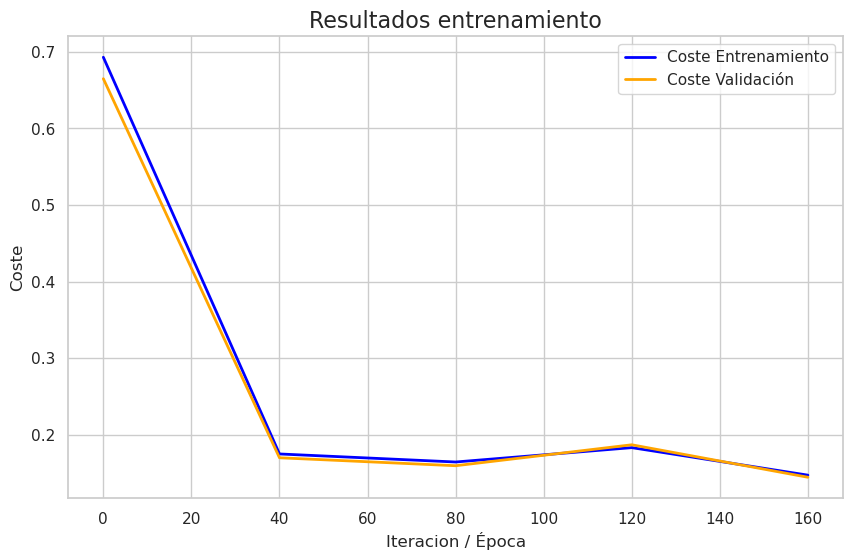

In [86]:
plot_historial('Resultados entrenamiento', 'Iteracion / Época', 'Coste', hist_coste_entr, hist_coste_val, intervalo_historial)

##### Matríz de confusión, precisión, sensibilidad y F1-Score

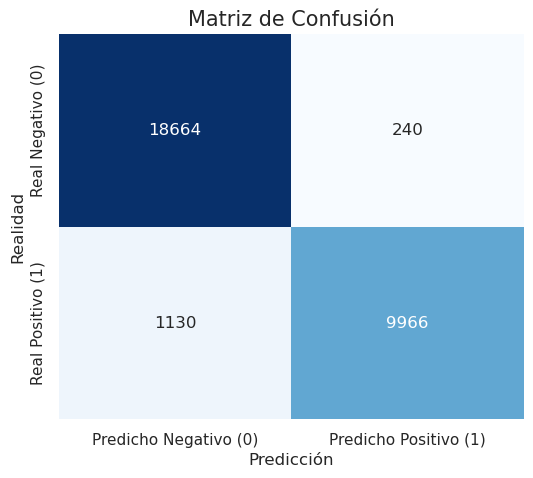

[RESULTADOS]
Verdaderos Negativos (VN): 18664
Falsos Positivos (FP): 240
Falsos Negativos (FN): 1130
Verdaderos Positivos (VP): 9966

[MÉTRICAS]
Recall o Sensibilidad (%): 89.81614996395098
Precisión (%): 97.64844209288654
F1-Score (%): 93.56867899727726


In [87]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo)

Éste ha sido hasta ahora el mejor modelo, con un 93% de F1-Score y una precisión altísima. La sensibilidad no es tan alta como nos gustaría, pero se puede arreglar bajando el umbral de activación de nuestra matriz de confusión.

Probémoslo para poder adquirir algo más de sensibilidad:

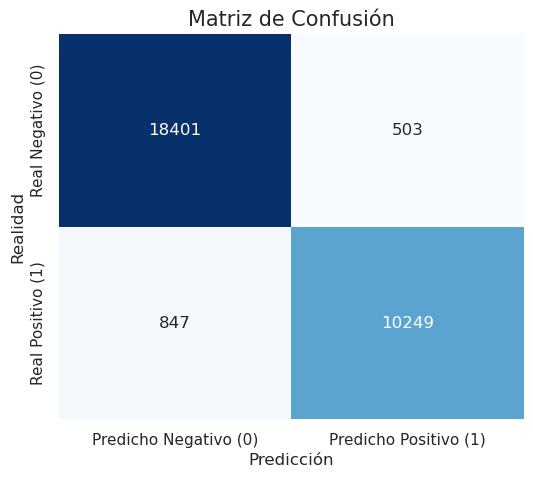

[RESULTADOS]
Verdaderos Negativos (VN): 18401
Falsos Positivos (FP): 503
Falsos Negativos (FN): 847
Verdaderos Positivos (VP): 10249

[MÉTRICAS]
Recall o Sensibilidad (%): 92.36661860129777
Precisión (%): 95.32180059523809
F1-Score (%): 93.82094470889784


In [88]:
calcular_matriz_confusion_metricas_red(X_test, y_test, modelo, 0.4)

Hemos conseguido aumentar la sensibilidad y el F1-Score, por lo que diría que hemos encontrado un umbral incluso mejor que `0.5`. Ésto puede deberse a que hay valores que con `0.5` se quedaban fuera por muy poco, y que con bajar un poco el umbral ya consiguen entrar a su categoría correcta.

Por tanto, usaremos dicho umbral para estudiar los fallos cometidos por la red neuronal:

In [89]:
capa_final, sin_uso = forward_propagation(X.T, modelo)

# Quitamos la dimensión que sobra
capa_final = capa_final.squeeze()

# Conseguimos una array "colapsado" de 0s y 1s con un 0.5 de umbral
capa_final = np.array([(el > 0.4) for el in capa_final]).astype(int)

falsos_negativos = datos_sanados[(datos_sanados[columna_objetivo] == 1) & (capa_final == 0)]
falsos_negativos = falsos_negativos[columnas_entr]

falsos_positivos = datos_sanados[(datos_sanados[columna_objetivo] == 0) & (capa_final == 1)]
falsos_positivos = falsos_positivos[columnas_entr]

reales_negativos = datos_sanados[(datos_sanados[columna_objetivo] == 0) & (capa_final == 0)]
reales_negativos = reales_negativos[columnas_entr]

reales_positivos = datos_sanados[(datos_sanados[columna_objetivo] == 1) & (capa_final == 1)]
reales_positivos = reales_positivos[columnas_entr]

Implementaremos también una función de plot sencilla para ver las diferencias entre uno y otro:

In [90]:
import matplotlib.pyplot as plt

def plot_diferencias(diferencias, titulo):
    # Cambiaremos los colores según si el valor es positivo o negativo
    colores = ['green' if x > 0 else 'red' for x in diferencias]

    # Calculamos la altura del gráfico
    plt.figure(figsize=(10, len(diferencias) * 0.4))
    
    # barh nos da un gráfico de barras horizontales
    diferencias.plot(kind='barh', color=colores, width=0.8)
    
    # Algunas decoraciones para que ayuden a ver el gráfico
    plt.axvline(0, color='black', linewidth=1)
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.xlabel("Diferencia de medias", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    plt.show()

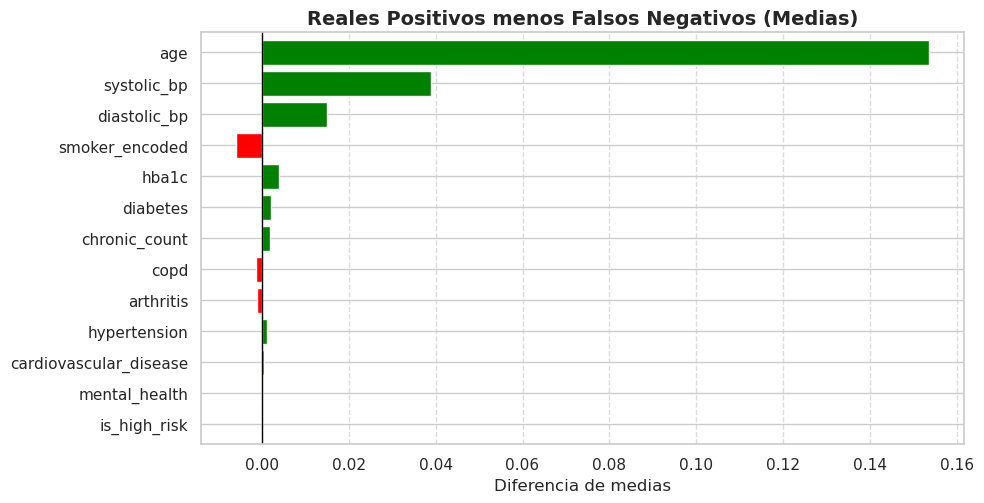

In [91]:
# Sacamos la diferencia de las medias
dif_real_pos_falso_neg =  reales_positivos.mean() - falsos_negativos.mean()
# Ordenamos por magnitud, de mayor a menor. Para ello,
# es necesario que al ordenar pongamos key=abs, para que trate a todos
# los valores como positivos y ordene en base a eso.
dif_real_pos_falso_neg = dif_real_pos_falso_neg.sort_values(key=abs)
plot_diferencias(dif_real_pos_falso_neg, "Reales Positivos menos Falsos Negativos (Medias)")

Está claro que nuestro modelo está **overfitted en la edad**: le da muchísima importancia a ésta. Y dado a que la diferencia es positiva, ésto significa que **no es capaz de identificar con facilidad a pacientes de riesgo jóvenes**.

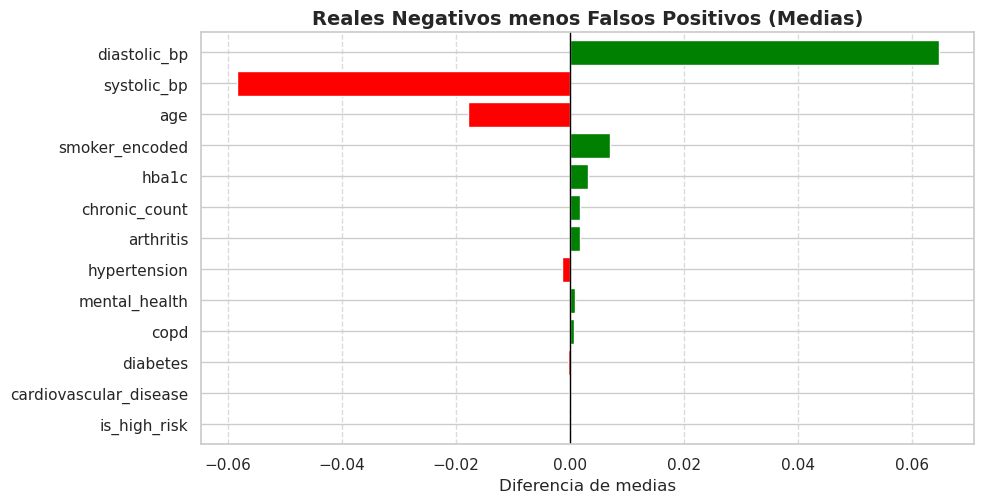

In [92]:
dif_real_neg_falso_pos =  reales_negativos.mean() - falsos_positivos.mean()
dif_real_neg_falso_pos = dif_real_neg_falso_pos.sort_values(key=abs)
plot_diferencias(dif_real_neg_falso_pos, "Reales Negativos menos Falsos Positivos (Medias)")

Las diferencias entre los reales negativos y los falsos positivos son más interesantes.

Aquí, también nos encontramos con que **el modelo tiene muy en cuenta la presión diasólica y sistólica, pudiendo estar algo overfitted** en éstas dos características. También nos ha vuelto a salir la edad: **las personas mayores son clasificadas más fácilmente como pacientes de riesgo**, pese a que  no lo sean.

También, mirando a ambas gráficas, **parece que la relación entre ser de riesgo o no es inversamente proporcional a ser fumador**, según el modelo. Posiblemente el modelo no haya sido capaz de aprender la importancia de ésta columna, o que la codificación no haya sido la más acertada.